In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.widgets import Cursor

In [3]:
# Загружаем данные из файлов
contacts_df = pd.read_parquet('drive/MyDrive/Final_Project_ICH/Clean_file/ContactsClean.parquet')
calls_df = pd.read_parquet('drive/MyDrive/Final_Project_ICH/Clean_file/CallsClean.parquet')
spend_df = pd.read_parquet('drive/MyDrive/Final_Project_ICH/Clean_file/SpendClean.parquet')
deals_df = pd.read_parquet('drive/MyDrive/Final_Project_ICH/Clean_file/DealsClean.parquet')

# **Contacts** Описательная статистика

In [4]:
contacts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18548 entries, 0 to 18547
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Id                  18548 non-null  object        
 1   Contact Owner Name  18548 non-null  object        
 2   Created Time        18548 non-null  datetime64[ns]
 3   Modified Time       18548 non-null  datetime64[ns]
dtypes: datetime64[ns](2), object(2)
memory usage: 579.8+ KB



Анализ столбца: Contact Owner Name
Contact Owner Name
Charlie Davis      2019
Ulysses Adams      1816
Julia Nelson       1769
Paula Underwood    1487
Quincy Vincent     1416
Nina Scott         1150
Ben Hall           1038
Victor Barnes       967
Cara Iverson        880
Rachel White        782
Name: count, dtype: int64

Процентное распределение:
Contact Owner Name
Charlie Davis      10.885271
Ulysses Adams       9.790813
Julia Nelson        9.537416
Paula Underwood     8.017037
Quincy Vincent      7.634246
Nina Scott          6.200129
Ben Hall            5.596291
Victor Barnes       5.213500
Cara Iverson        4.744447
Rachel White        4.216088
Name: proportion, dtype: float64


<ipython-input-5-84b2472a8942>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y=contacts_df["Contact Owner Name"],


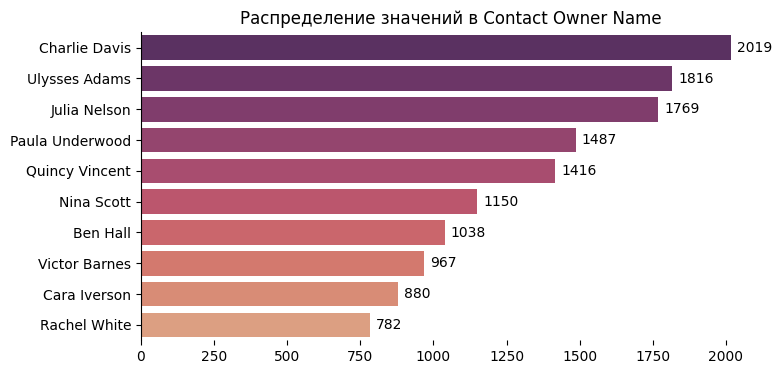

In [5]:
# Анализ категориального поля "Contact Owner Name"
print("\nАнализ столбца: Contact Owner Name")
print(contacts_df["Contact Owner Name"].value_counts().head(10))  # Топ-10 значений
print("\nПроцентное распределение:")
print(contacts_df["Contact Owner Name"].value_counts(normalize=True).head(10) * 100)

# Визуализация
plt.figure(figsize=(8, 4))
ax = sns.countplot(y=contacts_df["Contact Owner Name"],
                   order=contacts_df["Contact Owner Name"].value_counts().index[:10],
                   palette="flare_r")

# Убираем границы
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Добавление значений на полосы
for p in ax.patches:
    width = p.get_width()
    ax.text(width + max(contacts_df["Contact Owner Name"].value_counts()) * 0.01,
            p.get_y() + p.get_height()/2, f'{int(width)}', va='center')

plt.title("Распределение значений в Contact Owner Name")
plt.xlabel("")
plt.ylabel("")

plt.show()

In [6]:
# Извлечение даты из 'Created Time' и создание нового столбца 'Created Date'

contacts_df.loc[:, 'Created Date'] = contacts_df['Created Time'].dt.date
contacts_df.loc[:, 'Created Year'] = contacts_df['Created Time'].dt.year
contacts_df.loc[:, 'Created Month'] = contacts_df['Created Time'].dt.month
contacts_df.loc[:, 'Created Day'] = contacts_df['Created Time'].dt.day
contacts_df.loc[:, 'Created Day Of Week'] = contacts_df['Created Time'].dt.day_name()
contacts_df.loc[:, 'Created Hour'] = contacts_df['Created Time'].dt.hour

In [7]:
contacts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18548 entries, 0 to 18547
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Id                   18548 non-null  object        
 1   Contact Owner Name   18548 non-null  object        
 2   Created Time         18548 non-null  datetime64[ns]
 3   Modified Time        18548 non-null  datetime64[ns]
 4   Created Date         18548 non-null  object        
 5   Created Year         18548 non-null  int32         
 6   Created Month        18548 non-null  int32         
 7   Created Day          18548 non-null  int32         
 8   Created Day Of Week  18548 non-null  object        
 9   Created Hour         18548 non-null  int32         
dtypes: datetime64[ns](2), int32(4), object(4)
memory usage: 1.1+ MB


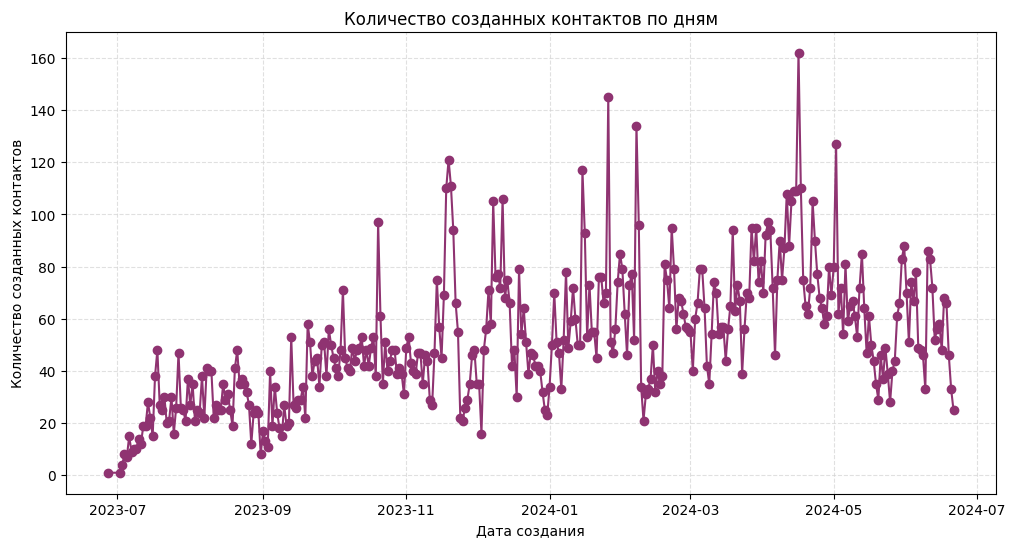

In [8]:
# Группировка по дате и подсчет количества созданных контактов
contacts_per_day_created = contacts_df.groupby('Created Date').size()

# Построение графика
plt.figure(figsize=(12, 6))
contacts_per_day_created.plot(kind='line', marker='o', color=sns.color_palette("flare_r")[1])

plt.title('Количество созданных контактов по дням')
plt.xlabel('Дата создания')
plt.ylabel('Количество созданных контактов')
plt.grid(axis='both', linestyle='--', alpha=0.7, color='lightgray')
plt.show()


<ipython-input-9-857274f44c35>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Created Day Of Week', data=contacts_df,


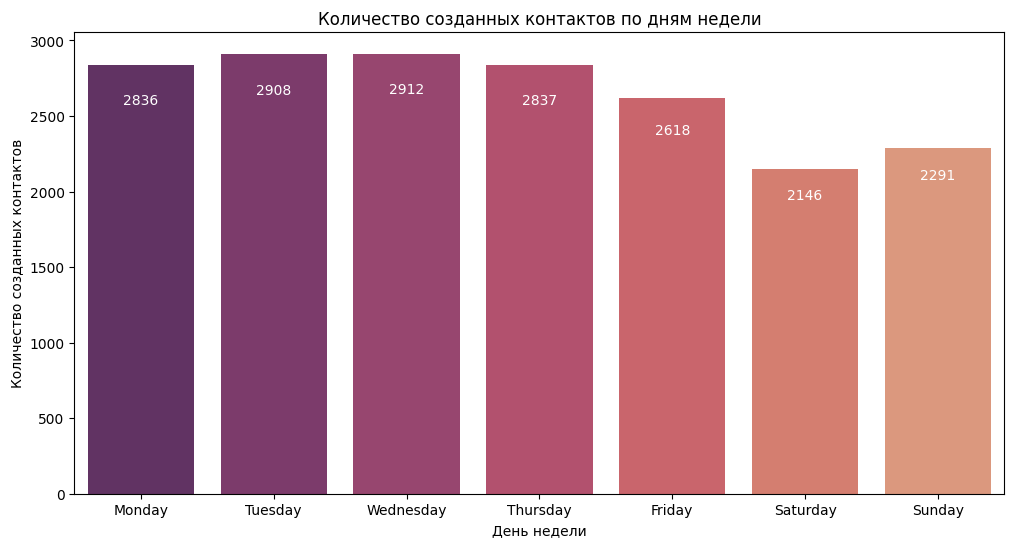

In [9]:
# График количества созданных контактов по дням недели
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='Created Day Of Week', data=contacts_df,
              order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
              palette="flare_r")

# Добавление значений на столбцы
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2, height / 1.1, f'{int(height)}',
            ha='center', fontsize=10, color='white')

plt.title('Количество созданных контактов по дням недели')
plt.xlabel('День недели')
plt.ylabel('Количество созданных контактов')

plt.show()

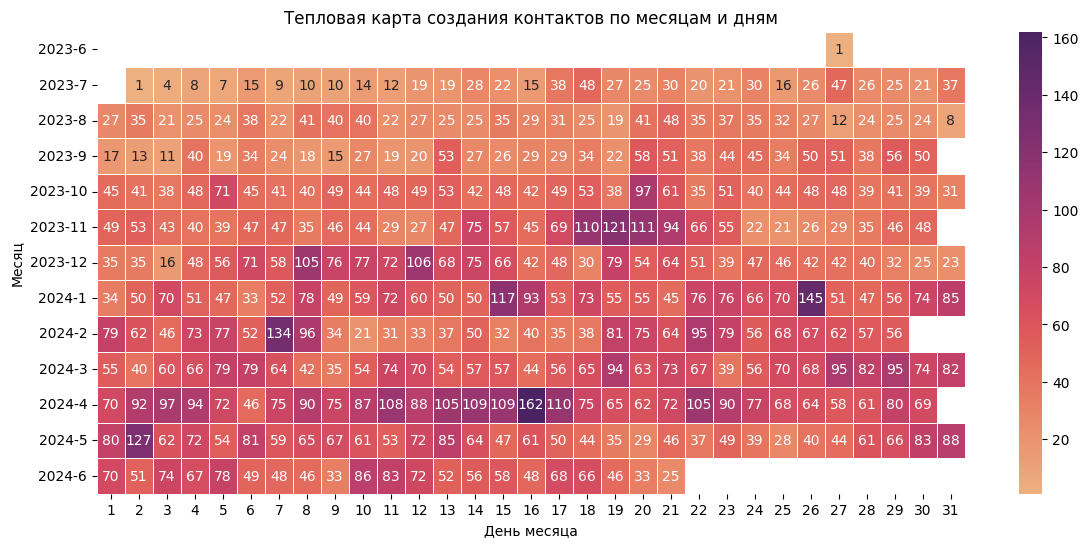

In [10]:
# Построение тепловой карты создания контактов по месяцам и дням
heatmap_data = contacts_df.groupby(['Created Year', 'Created Month', 'Created Day']).size().unstack(level=-1)

plt.figure(figsize=(14, 6))
sns.heatmap(heatmap_data, cmap="flare", annot=True, fmt='.0f', linewidths=0.5)
plt.title("Тепловая карта создания контактов по месяцам и дням")
plt.xlabel("День месяца")
plt.ylabel("Месяц")
plt.show()


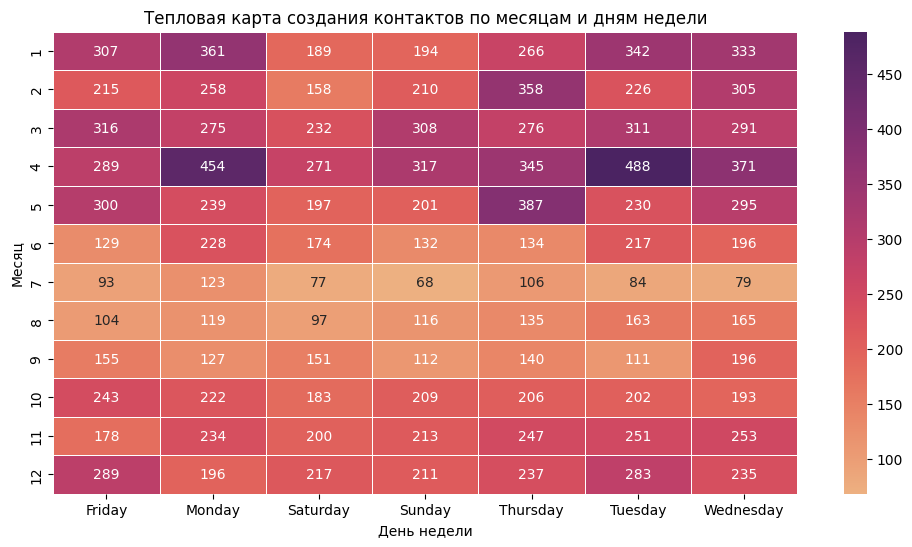

In [11]:
# Построение тепловой карты создания контактов по месяцам и дням недели
heatmap_weekday = contacts_df.groupby(['Created Month', 'Created Day Of Week']).size().unstack(level=-1)

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_weekday, cmap="flare", annot=True, fmt='.0f', linewidths=0.5)
plt.title("Тепловая карта создания контактов по месяцам и дням недели")
plt.xlabel("День недели")
plt.ylabel("Месяц")
plt.show()

In [12]:
# удаляем столбецы которые сгенерировали для анализа времени
contacts_df = contacts_df.drop(columns=['Created Date', 'Created Year', 'Created Month', 'Created Day', 'Created Day Of Week', 'Created Hour'])

# **Calls** Описательная статистика

In [13]:
calls_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95874 entries, 0 to 95873
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Id                          95874 non-null  object        
 1   Call Start Time             95874 non-null  datetime64[ns]
 2   Call Owner Name             95874 non-null  object        
 3   CONTACTID                   91941 non-null  object        
 4   Call Type                   95874 non-null  object        
 5   Call Duration (in seconds)  95874 non-null  float64       
 6   Call Status                 95874 non-null  object        
 7   Outgoing Call Status        95874 non-null  object        
 8   Scheduled in CRM            95874 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(7)
memory usage: 6.6+ MB


In [14]:
# Вывод количества уникальных значений и их частоты для каждой категориальной переменной, кроме 'CONTACTID' и 'Id'
for col in calls_df.select_dtypes(include=['object']).columns:
    if col not in ['CONTACTID', 'Id']:
        print(f"\nСтатистика по {col}:")
        print(calls_df[col].value_counts().head(100))  # Выводим 100 значений
        print("-" * 50)  # Разделитель для удобства чтения


Статистика по Call Owner Name:
Call Owner Name
Yara Edwards       9059
Julia Nelson       7446
Ian Miller         7215
Charlie Davis      7213
Diana Evans        6857
Ulysses Adams      6085
Amy Green          5982
Nina Scott         5581
Victor Barnes      5439
Kevin Parker       5406
Paula Underwood    4580
Quincy Vincent     4384
Jane Smith         3753
Cara Iverson       3300
John Doe           2986
Ben Hall           2947
Alice Johnson      1251
Mason Roberts      1166
Derek James         948
George King         850
Zachary Foster      523
Eva Kent            498
Fiona Jackson       470
Sam Young           457
Rachel White        441
Xander Dean         304
Ethan Harris        280
Hannah Lee          175
Wendy Clark         162
Bob Brown            99
Oliver Taylor        10
Tina Zhang            5
Laura Quinn           2
Name: count, dtype: int64
--------------------------------------------------

Статистика по Call Type:
Call Type
Outbound    86875
Missed       5921
Inbound    

In [15]:
# сводная статистика только для числовых столбцов
numeric_stats = calls_df.select_dtypes(include=['number']).describe()

display(numeric_stats)

,Call Duration (in seconds)
count,95874.000000
mean,164.834439
std,401.266369
min,0.000000
25%,4.000000
50%,8.000000
75%,97.000000
max,7625.000000


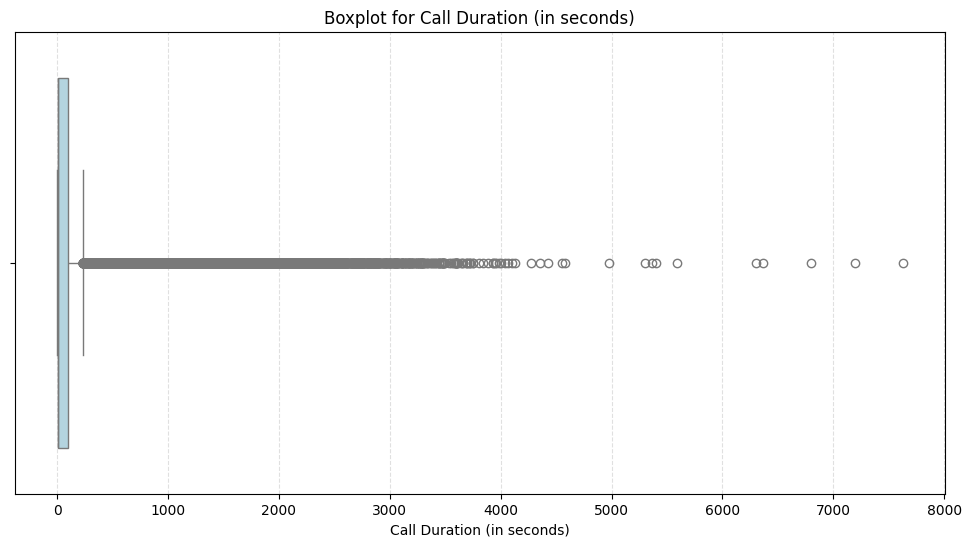

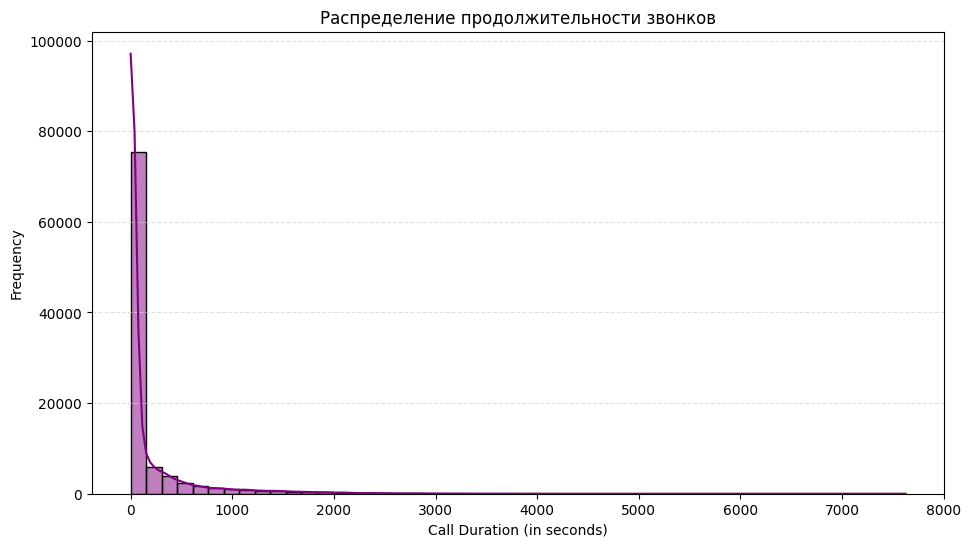

In [16]:
# Анализ длительности звонков (Call Duration in seconds)
plt.figure(figsize=(12, 6))
sns.boxplot(data=calls_df, x='Call Duration (in seconds)', color='lightblue')
plt.title('Boxplot for Call Duration (in seconds)')
plt.xlabel('Call Duration (in seconds)')
plt.grid(axis='x', linestyle='--', alpha=0.7, color='lightgray')
plt.show()

# Гистограмма распределения длительности звонков
plt.figure(figsize=(11, 6))
sns.histplot(calls_df['Call Duration (in seconds)'], bins=50, kde=True, color='purple')
plt.title('Распределение продолжительности звонков')
plt.xlabel('Call Duration (in seconds)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7, color='lightgray')
plt.show()


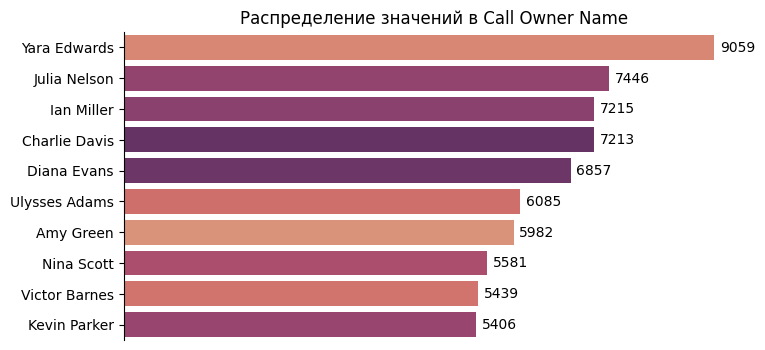


Процентное распределение:
Call Owner Name
Yara Edwards       9.448860
Julia Nelson       7.766443
Ian Miller         7.525502
Charlie Davis      7.523416
Diana Evans        7.152095
Ulysses Adams      6.346872
Amy Green          6.239439
Nina Scott         5.821182
Victor Barnes      5.673071
Kevin Parker       5.638651
Paula Underwood    4.777103
Quincy Vincent     4.572668
Jane Smith         3.914513
Cara Iverson       3.442018
John Doe           3.114504
Ben Hall           3.073826
Alice Johnson      1.304838
Mason Roberts      1.216180
Derek James        0.988798
George King        0.886580
Name: proportion, dtype: float64


In [17]:
# Визуализация
plt.figure(figsize=(8, 4))
ax = sns.countplot(y=calls_df['Call Owner Name'],
                   order =calls_df['Call Owner Name'].value_counts().index[:10],
                   hue=calls_df['Call Owner Name'],
                   palette="flare_r",
                   legend=False)


# Добавление значений на полосы
for p in ax.patches:
    width = p.get_width()
    plt.text(width + max(calls_df['Call Owner Name'].value_counts()) * 0.01, p.get_y() + p.get_height()/2, f'{int(width)}', va='center')

# Убираем границы
for spine in ['top', 'right', 'bottom']:
    ax.spines[spine].set_visible(False)

plt.title(f"Распределение значений в {'Call Owner Name'}")
plt.ylabel('')
plt.xlabel("")
ax.set_xticks([])

plt.show()

print("\nПроцентное распределение:")
print(calls_df['Call Owner Name'].value_counts(normalize=True).head(20) * 100)
# print(f"\n\033[1m\033[34mАнализ столбца: {'Call Owner Name'}\033[0m")
# print(calls_df['Call Owner Name'].value_counts().head(20))

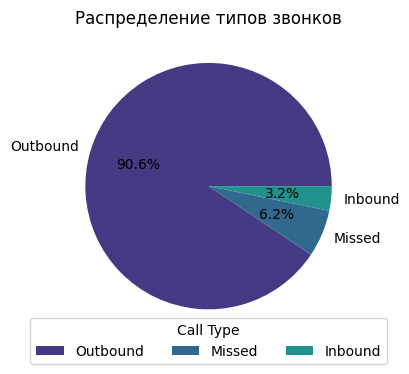

In [18]:
# Построение круговой диаграммы для типов звонков
plt.figure(figsize=(8, 4))
plt.pie(calls_df['Call Type'].value_counts().head(10),
        labels=calls_df['Call Type'].value_counts().head(10).index,
        autopct='%1.1f%%', colors=sns.color_palette("viridis", 5))
plt.title("Распределение типов звонков")
plt.legend(title='Call Type', loc='lower center', bbox_to_anchor=(0.5, -0.1), ncol=3)
plt.show()


# print("\nПроцентное распределение:")
# print(calls_df['Call Type'].value_counts(normalize=True).head(20) * 100)

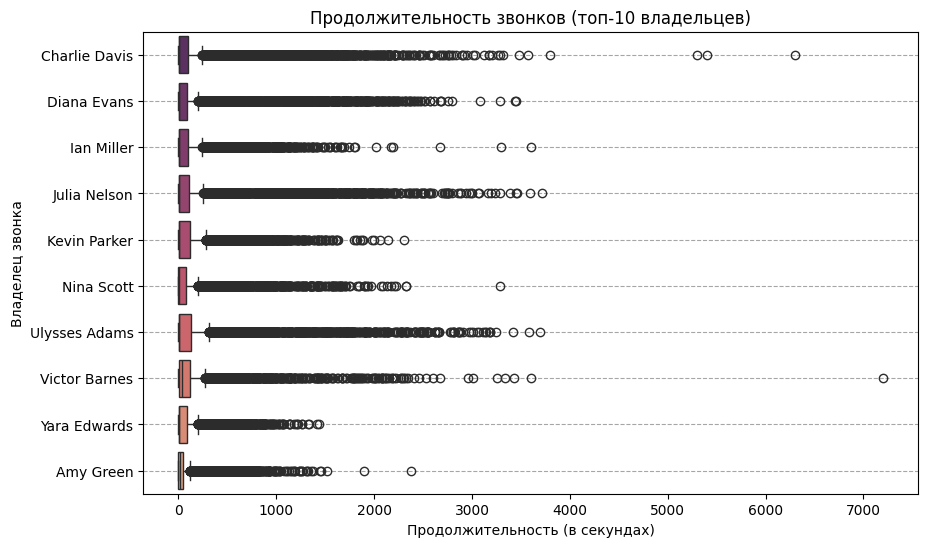

In [19]:
# Получаем топ-10 владельцев по количеству звонков
top_owners = calls_df['Call Owner Name'].value_counts().head(10).index

# Фильтруем DataFrame по этим владельцам
top_calls_df = calls_df[calls_df['Call Owner Name'].isin(top_owners)]

# Построение боксплота
plt.figure(figsize=(10, 6))
ax = sns.boxplot(y='Call Owner Name',
                 x='Call Duration (in seconds)',
                 data=top_calls_df,
                 hue='Call Owner Name',
                 palette='flare_r',
                 legend=False)

plt.title('Продолжительность звонков (топ-10 владельцев)')
plt.xlabel('Продолжительность (в секундах)')
plt.ylabel('Владелец звонка')
plt.xticks(ha='center')
plt.grid(axis='y', linestyle='--', alpha=0.7, color='gray')
plt.show()

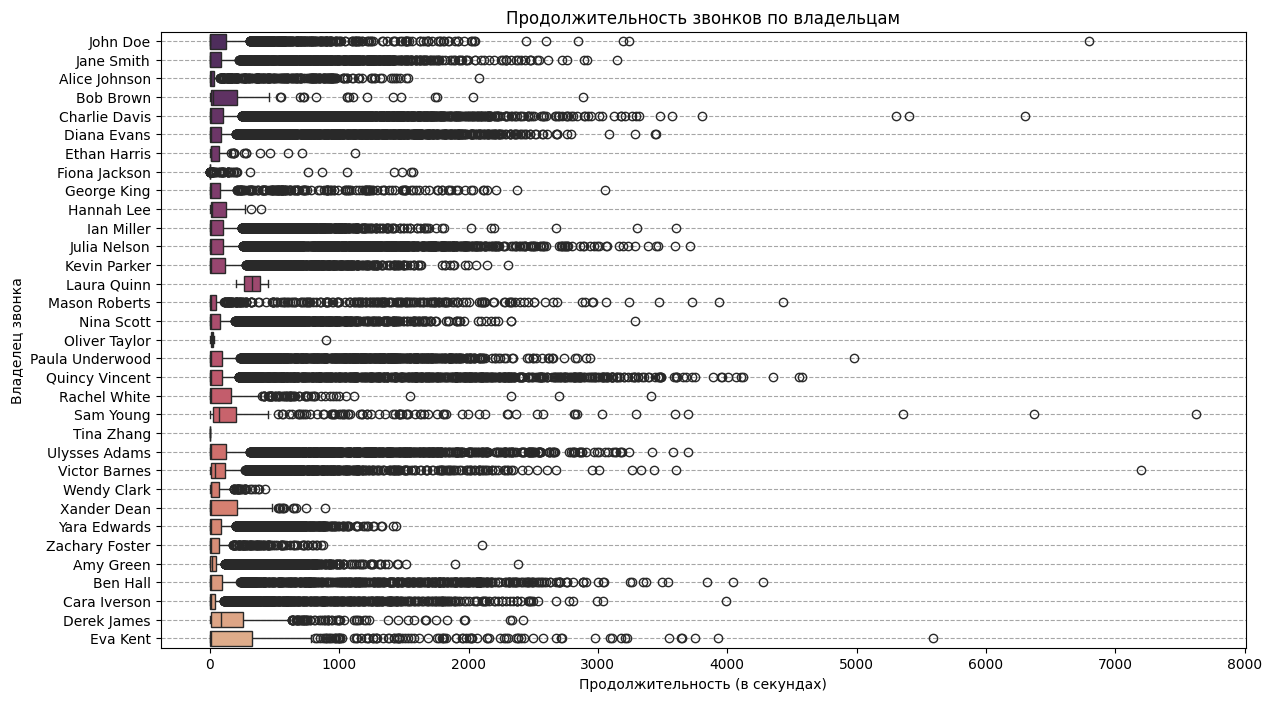

In [20]:
# Построение боксплота для продолжительности звонков по владельцам

plt.figure(figsize=(14, 8))
ax = sns.boxplot(y='Call Owner Name',
                 x='Call Duration (in seconds)',
                 data=calls_df,
                 hue='Call Owner Name',
                 palette='flare_r',
                 legend=False)
plt.title('Продолжительность звонков по владельцам')
plt.xlabel('Продолжительность (в секундах)')
plt.ylabel('Владелец звонка')
plt.xticks(ha='center')
plt.grid(axis='y', linestyle='--', alpha=0.7, color='gray')
plt.show()



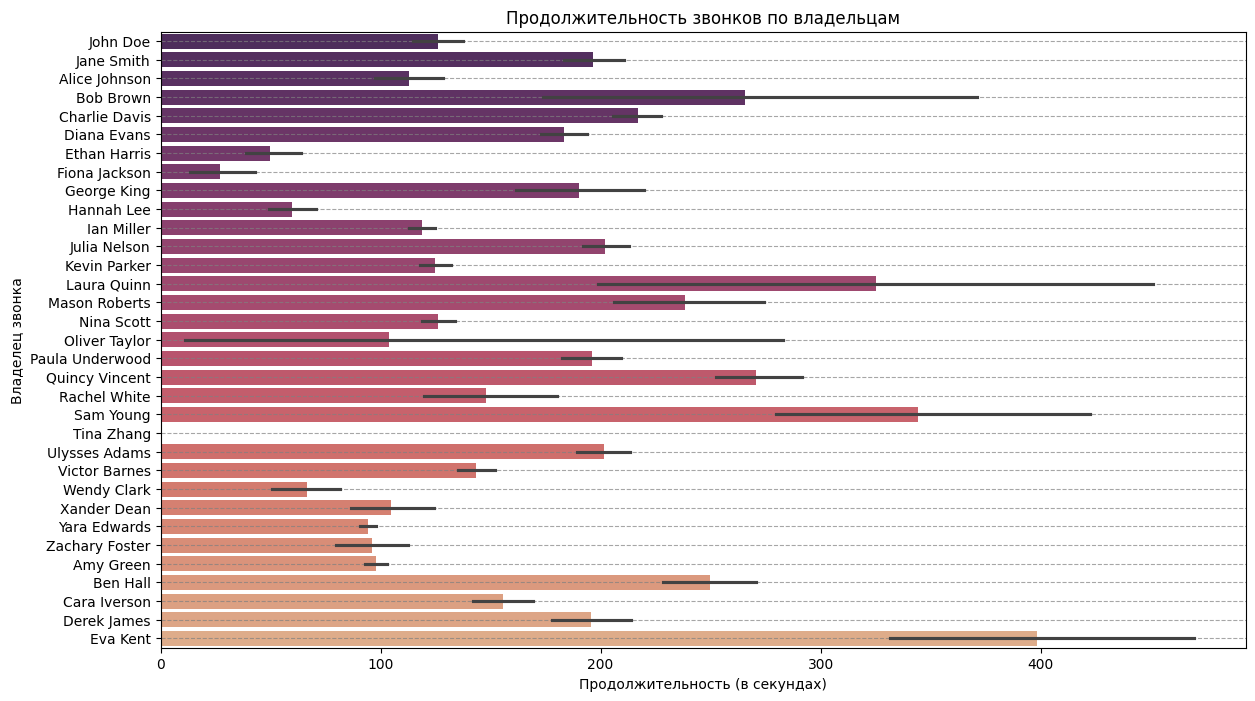

In [21]:
# Получаем топ-10 владельцев по количеству звонков
top_owners = calls_df['Call Owner Name'].value_counts().head(10).index

# Фильтруем DataFrame по этим владельцам
top_calls_df = calls_df[calls_df['Call Owner Name'].isin(top_owners)]

plt.figure(figsize=(14, 8))
ax = sns.barplot(y='Call Owner Name',
                 x='Call Duration (in seconds)',
                 data=calls_df,
                 hue='Call Owner Name',
                 palette='flare_r',
                 legend=False)
plt.title('Продолжительность звонков по владельцам')

plt.xlabel('Продолжительность (в секундах)')
plt.ylabel('Владелец звонка')
plt.xticks(ha='center')
plt.grid(axis='y', linestyle='--', alpha=0.7, color='gray')
plt.show()



Анализ столбца: Call Status
Call Status
Attended Dialled              70703
Unattended Dialled            16030
Missed                         5922
Received                       3077
Overdue                          60
Scheduled Attended Delay         22
Cancelled                        20
Scheduled Unattended Delay       17
Scheduled Attended               14
Scheduled Unattended              6
Scheduled                         3
Name: count, dtype: int64


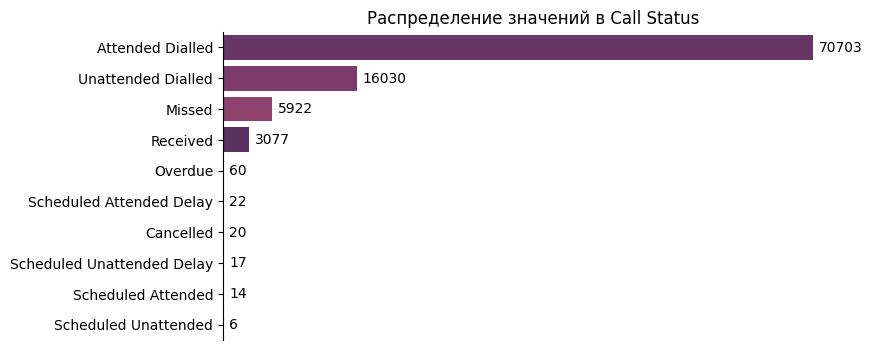


Процентное распределение:
Call Status
Attended Dialled              73.745750
Unattended Dialled            16.719861
Missed                         6.176857
Received                       3.209421
Overdue                        0.062582
Scheduled Attended Delay       0.022947
Cancelled                      0.020861
Scheduled Unattended Delay     0.017732
Scheduled Attended             0.014602
Scheduled Unattended           0.006258
Scheduled                      0.003129
Name: proportion, dtype: float64

Анализ столбца: Outgoing Call Status
Outgoing Call Status
Completed    86792
Unknown       8999
Overdue         60
Cancelled       20
Scheduled        3
Name: count, dtype: int64


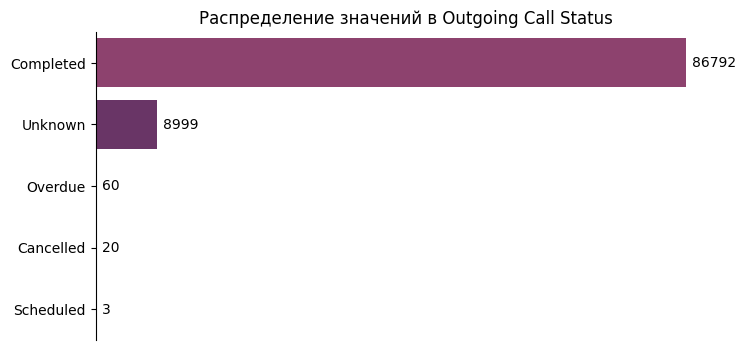


Процентное распределение:
Outgoing Call Status
Completed    90.527150
Unknown       9.386278
Overdue       0.062582
Cancelled     0.020861
Scheduled     0.003129
Name: proportion, dtype: float64


In [22]:
# Категориальные колонки для анализа
columns = ['Call Status', 'Outgoing Call Status']


for column in columns:
    print(f"\n\033[1m\033[34mАнализ столбца: {column}\033[0m")
    print(calls_df[column].value_counts().head(20))

    # Визуализация
    plt.figure(figsize=(8, 4))
    ax = sns.countplot(y=calls_df[column],
                       order =calls_df[column].value_counts().index[:10],
                       hue=calls_df[column],
                       palette="flare_r",
                       legend=False)
    # ax = sns.countplot(y=calls_df[column], order =calls_df[column].value_counts().index[:10], palette="flare_r") # crest

    # Добавление значений на полосы
    for p in ax.patches:
        width = p.get_width()
        plt.text(width + max(calls_df[column].value_counts()) * 0.01, p.get_y() + p.get_height()/2, f'{int(width)}', va='center')

    # Убираем границы
    for spine in ['top', 'right', 'bottom']:
        ax.spines[spine].set_visible(False)

    plt.title(f"Распределение значений в {column}")
    plt.ylabel('')
    plt.xlabel("")
    ax.set_xticks([])

    plt.show()

    print("\nПроцентное распределение:")
    print(calls_df[column].value_counts(normalize=True).head(20) * 100)

In [23]:
# Извлечение даты из 'Call Start Time' и создание новых

calls_df.loc[:, 'Call Date'] = calls_df['Call Start Time'].dt.date
calls_df.loc[:, 'Call Year'] = calls_df['Call Start Time'].dt.year
calls_df.loc[:, 'Call Month'] = calls_df['Call Start Time'].dt.month
calls_df.loc[:, 'Call Day'] = calls_df['Call Start Time'].dt.day
calls_df.loc[:, 'Call Day Of Week'] = calls_df['Call Start Time'].dt.day_name()
calls_df.loc[:, 'Call Hour'] = calls_df['Call Start Time'].dt.hour

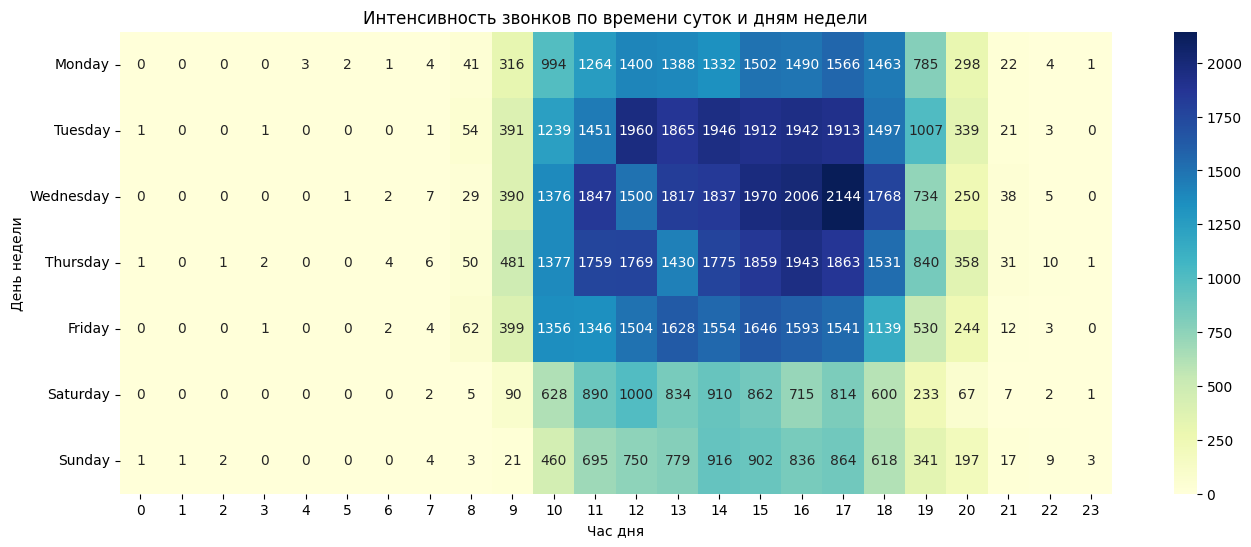

In [24]:
# Тепловая карта: интенсивность звонков по времени суток и дням недели
call_counts = calls_df.groupby(['Call Day Of Week', 'Call Hour']).size().unstack(fill_value=0)

# Упорядочим дни недели
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
call_counts = call_counts.reindex(days_order)

plt.figure(figsize=(16, 6))
sns.heatmap(call_counts, cmap='YlGnBu', annot=True, fmt='d')
plt.title('Интенсивность звонков по времени суток и дням недели')
plt.xlabel('Час дня')
plt.ylabel('День недели')
plt.show()

In [25]:
# удаляем столбецы которые сгенерировали для анализа времени
calls_df = calls_df.drop(columns=['Call Date', 'Call Year', 'Call Month', 'Call Day', 'Call Day Of Week', 'Call Hour'])

# Объединение таблиц **Contacts** и **Calls** по (Id -> CONTACTID)

In [26]:
# Объединяем таблицы по полям Id (в Contacts) и CONTACTID (в Calls)
calls_contacts = contacts_df.merge(calls_df, left_on='Id', right_on='CONTACTID', how='left', suffixes=('_contacts', '_calls'))

# Выводим первые строки объединенного датафрейма
calls_contacts.head()


,Id_contacts,Contact Owner Name,Created Time,Modified Time,Id_calls,Call Start Time,Call Owner Name,CONTACTID,Call Type,Call Duration (in seconds),Call Status,Outgoing Call Status,Scheduled in CRM
0,5805028000000645014,Rachel White,2023-06-27 11:28:00,2023-12-22 13:34:00,5805028000000787003,2023-06-30 09:20:00,John Doe,5805028000000645014,Outbound,6.0,Attended Dialled,Completed,False
1,5805028000000645014,Rachel White,2023-06-27 11:28:00,2023-12-22 13:34:00,5805028000000768019,2023-06-30 09:30:00,John Doe,5805028000000645014,Outbound,11.0,Attended Dialled,Completed,False
2,5805028000000645014,Rachel White,2023-06-27 11:28:00,2023-12-22 13:34:00,5805028000000790004,2023-06-30 12:09:00,John Doe,5805028000000645014,Outbound,12.0,Attended Dialled,Completed,False
3,5805028000000645014,Rachel White,2023-06-27 11:28:00,2023-12-22 13:34:00,5805028000000773022,2023-06-30 14:24:00,John Doe,5805028000000645014,Outbound,4.0,Attended Dialled,Completed,False
4,5805028000000645014,Rachel White,2023-06-27 11:28:00,2023-12-22 13:34:00,5805028000000942048,2023-07-04 15:35:00,Jane Smith,5805028000000645014,Outbound,20.0,Attended Dialled,Completed,False


In [27]:
# удаляем повторяющийся столбец
calls_contacts = calls_contacts.drop(columns=['CONTACTID'])

In [28]:
calls_contacts.duplicated().sum()

np.int64(0)

In [29]:
calls_contacts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95275 entries, 0 to 95274
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Id_contacts                 95275 non-null  object        
 1   Contact Owner Name          95275 non-null  object        
 2   Created Time                95275 non-null  datetime64[ns]
 3   Modified Time               95275 non-null  datetime64[ns]
 4   Id_calls                    91941 non-null  object        
 5   Call Start Time             91941 non-null  datetime64[ns]
 6   Call Owner Name             91941 non-null  object        
 7   Call Type                   91941 non-null  object        
 8   Call Duration (in seconds)  91941 non-null  float64       
 9   Call Status                 91941 non-null  object        
 10  Outgoing Call Status        91941 non-null  object        
 11  Scheduled in CRM            91941 non-null  object    

In [30]:
# Создаем новый столбец, где True — совпадают, False — нет
calls_contacts['Owner Match'] = calls_contacts['Contact Owner Name'] == calls_contacts['Call Owner Name']

# Посмотрим количество совпадений и несовпадений
print(calls_contacts['Owner Match'].value_counts())

# (опционально) Посмотрим строки, где нет совпадения
mismatches = calls_contacts[calls_contacts['Owner Match'] == False]
print(mismatches[['Contact Owner Name', 'Call Owner Name']].head(10))

Owner Match
False    51068
True     44207
Name: count, dtype: int64
   Contact Owner Name Call Owner Name
0        Rachel White        John Doe
1        Rachel White        John Doe
2        Rachel White        John Doe
3        Rachel White        John Doe
4        Rachel White      Jane Smith
5        Rachel White      Jane Smith
6        Rachel White      Jane Smith
7        Rachel White      Jane Smith
8       Charlie Davis        John Doe
10      Charlie Davis        John Doe


In [31]:
# Заполняем пропущенные значения в столбце 'Call Duration (in seconds)' нулями
# calls_contacts['Call Duration (in seconds)'] = calls_contacts['Call Duration (in seconds)'].fillna(0)

In [32]:
calls_contacts = calls_contacts.rename(columns={'Call Duration (in seconds)': 'Call Duration'})

In [33]:
calls_contacts.nunique()

,0
Id_contacts,18548
Contact Owner Name,27
Created Time,17921
Modified Time,16580
Id_calls,91939
Call Start Time,66325
Call Owner Name,32
Call Type,3
Call Duration,2603
Call Status,6


In [34]:
# calls_contacts.nunique().isnull()

# *Сохранение объедененных таблиц* Contacts_and_Calls

In [35]:
calls_contacts.to_parquet('drive/MyDrive/Final_Project_ICH/Join_file/Contacts_and_Calls.parquet')
calls_contacts.to_csv('drive/MyDrive/Final_Project_ICH/Join_file/Contacts_and_Calls.csv')

# **Spend** Описательная статистика

In [36]:
spend_df = pd.read_parquet('drive/MyDrive/Final_Project_ICH/Clean_file/SpendClean.parquet')
deals_df = pd.read_parquet('drive/MyDrive/Final_Project_ICH/Clean_file/DealsClean.parquet')

In [37]:
spend_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19600 entries, 0 to 20778
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         19600 non-null  datetime64[ns]
 1   Source       19600 non-null  object        
 2   Campaign     14616 non-null  object        
 3   Impressions  19600 non-null  int64         
 4   Spend        19600 non-null  float64       
 5   Clicks       19600 non-null  int64         
 6   AdGroup      13782 non-null  object        
 7   Ad           13782 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 1.3+ MB


In [38]:
# сводная статистика только для числовых столбцов
numeric_stats = spend_df.select_dtypes(include=['number']).describe()

display(numeric_stats)

,Impressions,Spend,Clicks
count,19600.000000,19600.000000,19600.000000
mean,2603.828622,7.597716,25.368827
std,11765.687841,27.496417,87.561381
min,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000
50%,85.000000,0.755000,2.000000
75%,772.500000,6.220000,13.000000
max,431445.000000,774.000000,2415.000000


<Figure size 1200x600 with 0 Axes>

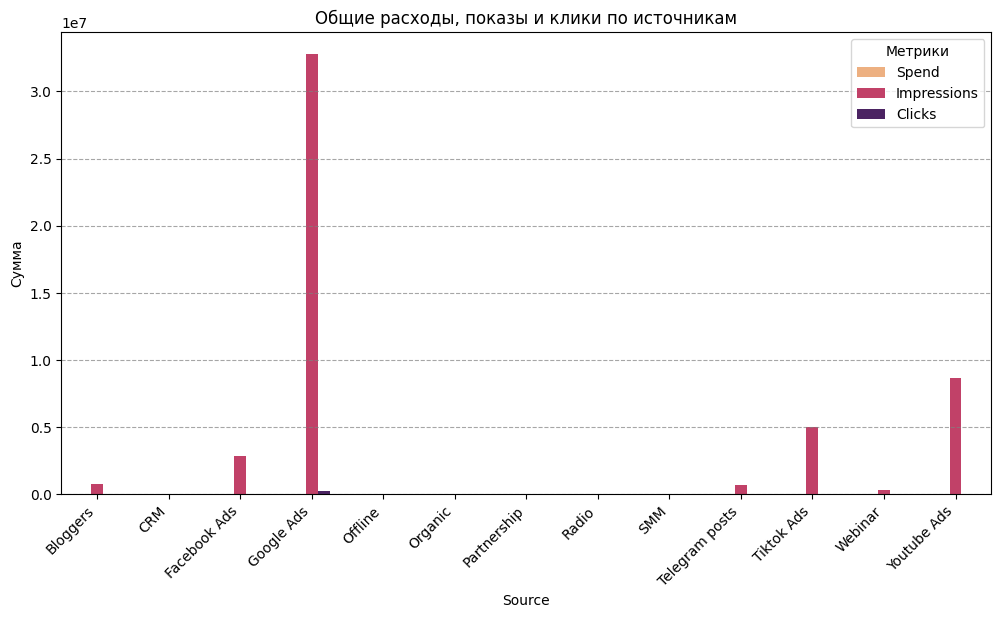

In [39]:
# Анализ по источникам
source_summary = spend_df.groupby('Source').agg({
    'Spend': 'sum',
    'Impressions': 'sum',
    'Clicks': 'sum'
}).reset_index()

# Визуализация расходов, показов и кликов по источникам
plt.figure(figsize=(12, 6))
ax = source_summary.set_index('Source')[['Spend', 'Impressions', 'Clicks']].plot(kind='bar', figsize=(12, 6), colormap='flare')
plt.title('Общие расходы, показы и клики по источникам')
plt.ylabel('Сумма')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Метрики')
plt.grid(axis='y', linestyle='--', alpha=0.7, color='gray')
plt.show()

In [40]:
# Вывод количества уникальных значений и их частоты для каждой категориальной переменной

for col in spend_df.select_dtypes(include=['object']).columns:
    print(f"\nСтатистика по {col}:")
    print(spend_df[col].value_counts().head(100))  # Выводим 100 значений
    print("-" * 50)  # Разделитель для удобства чтения


Статистика по Source:
Source
Facebook Ads      9569
Tiktok Ads        2985
Youtube Ads       1784
Google Ads        1266
Telegram posts     836
Webinar            766
Bloggers           632
SMM                571
Organic            514
CRM                355
Partnership        234
Offline             61
Radio               27
Name: count, dtype: int64
--------------------------------------------------

Статистика по Campaign:
Campaign
12.07.2023wide_DE              2073
02.07.23wide_DE                1685
04.07.23recentlymoved_DE       1398
youtube_shorts_DE              1223
07.07.23LAL_DE                 1181
03.07.23women                  1171
12.09.23interests_Uxui_DE      1143
15.07.23b_DE                    529
24.09.23retargeting_DE          504
performancemax_eng_DE           355
20.03.2024wide_PL               240
30.11.23wide_DE                 233
05.07.23interests_DE            214
17.03.24wide_AT                 198
20.03.24interests_WebDev_PL     169
discovery_DE        

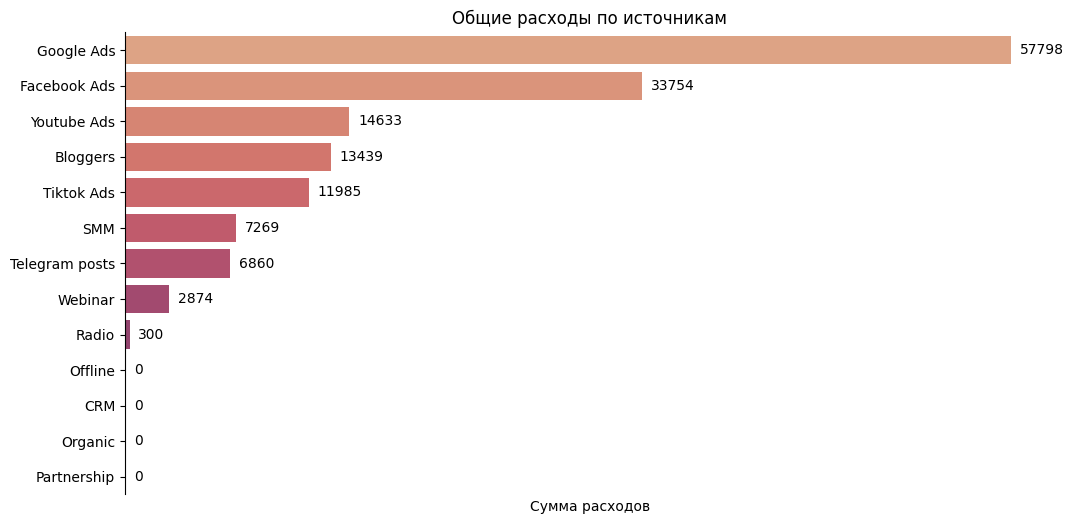

In [87]:
# Группировка данных по источникам и суммирование затрат
source_summary = spend_df.groupby('Source')['Spend'].sum().reset_index()

# Сортировка по убыванию расходов
source_summary = source_summary.sort_values(by='Spend', ascending=False)

plt.figure(figsize=(12, 6))
ax = sns.barplot(y=source_summary['Source'],
                 x=source_summary['Spend'],
                 hue=source_summary['Source'],
                 palette="flare",
                 legend=False)

# Добавление значений на полосы
for p in ax.patches:
    width = p.get_width()  # Получаем ширину столбца
    plt.text(width + max(source_summary['Spend']) * 0.01,  # Смещение справа на 1% от max
             p.get_y() + p.get_height() / 2,  # Центрирование по оси Y
             f'{int(width)}',  # Округляем и вставляем число
             va='center')

# Убираем границы
for spine in ['top', 'right', 'bottom']:
  ax.spines[spine].set_visible(False)


plt.title("Общие расходы по источникам")
plt.xlabel("Сумма расходов")
ax.set_xticks([])
plt.ylabel('')

plt.show()


Анализ столбца: Source
Source
Facebook Ads      9569
Tiktok Ads        2985
Youtube Ads       1784
Google Ads        1266
Telegram posts     836
Webinar            766
Bloggers           632
SMM                571
Organic            514
CRM                355
Partnership        234
Offline             61
Radio               27
Name: count, dtype: int64


<ipython-input-42-9b024b79657f>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y=spend_df[column], order=spend_df[column].value_counts().index[:10], palette="flare_r", legend=False)


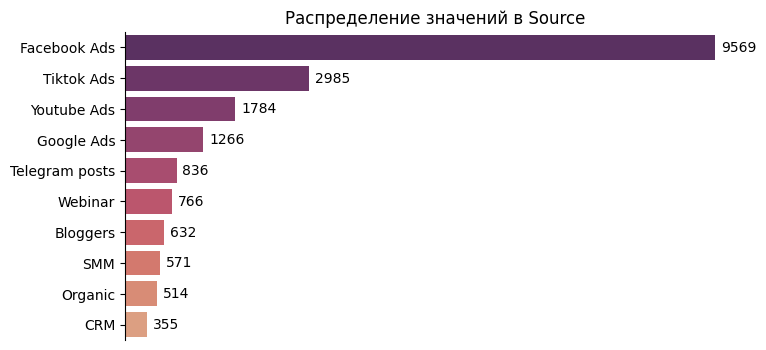


Процентное распределение:
Source
Facebook Ads      48.821429
Tiktok Ads        15.229592
Youtube Ads        9.102041
Google Ads         6.459184
Telegram posts     4.265306
Webinar            3.908163
Bloggers           3.224490
SMM                2.913265
Organic            2.622449
CRM                1.811224
Partnership        1.193878
Offline            0.311224
Radio              0.137755
Name: proportion, dtype: float64

Анализ столбца: Campaign
Campaign
12.07.2023wide_DE              2073
02.07.23wide_DE                1685
04.07.23recentlymoved_DE       1398
youtube_shorts_DE              1223
07.07.23LAL_DE                 1181
03.07.23women                  1171
12.09.23interests_Uxui_DE      1143
15.07.23b_DE                    529
24.09.23retargeting_DE          504
performancemax_eng_DE           355
20.03.2024wide_PL               240
30.11.23wide_DE                 233
05.07.23interests_DE            214
17.03.24wide_AT                 198
20.03.24interests_WebDev_PL   

<ipython-input-42-9b024b79657f>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y=spend_df[column], order=spend_df[column].value_counts().index[:10], palette="flare_r", legend=False)


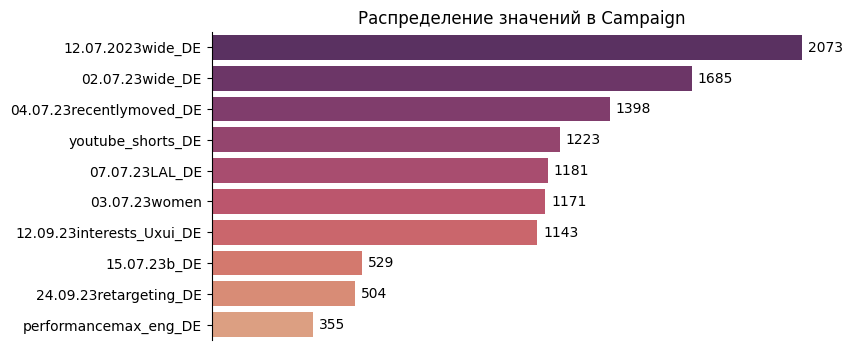


Процентное распределение:
Campaign
12.07.2023wide_DE              14.183087
02.07.23wide_DE                11.528462
04.07.23recentlymoved_DE        9.564860
youtube_shorts_DE               8.367542
07.07.23LAL_DE                  8.080186
03.07.23women                   8.011768
12.09.23interests_Uxui_DE       7.820197
15.07.23b_DE                    3.619321
24.09.23retargeting_DE          3.448276
performancemax_eng_DE           2.428845
20.03.2024wide_PL               1.642036
30.11.23wide_DE                 1.594143
05.07.23interests_DE            1.464149
17.03.24wide_AT                 1.354680
20.03.24interests_WebDev_PL     1.156267
discovery_DE                    1.135742
brand_search_eng_DE             0.998905
youtube_shortsin_AT             0.909962
08.04.24wide_webinar_DE         0.909962
20.05.24interests_DE            0.889436
Name: proportion, dtype: float64

Анализ столбца: AdGroup
AdGroup
wide                             5451
recentlymoved                    1442
wo

<ipython-input-42-9b024b79657f>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y=spend_df[column], order=spend_df[column].value_counts().index[:10], palette="flare_r", legend=False)


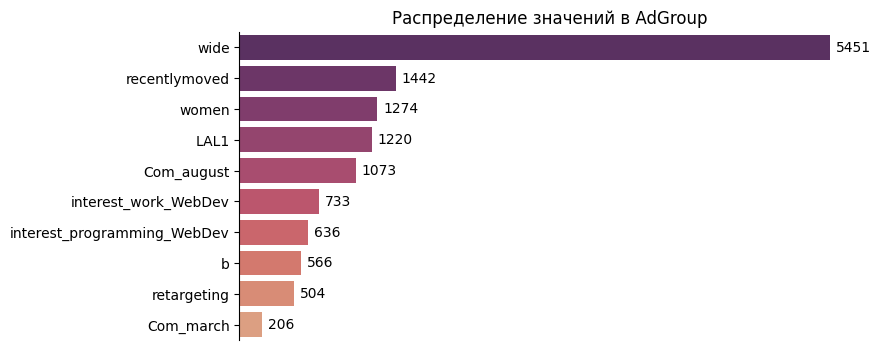


Процентное распределение:
AdGroup
wide                             39.551589
recentlymoved                    10.462923
women                             9.243941
LAL1                              8.852126
Com_august                        7.785517
interest_work_WebDev              5.318531
interest_programming_WebDev       4.614715
b                                 4.106806
retargeting                       3.656944
Com_march                         1.494703
interest_work                     1.313307
Com_july_1                        1.088376
interest_programming              0.877957
promoposts_b                      0.515165
berlin_wide                       0.348280
interest_all                      0.261210
interest_python-developer         0.203164
interest_dataanalytics            0.195908
interest_programming – Copy       0.058047
interest_dataanalytics – Copy     0.050791
Name: proportion, dtype: float64

Анализ столбца: Ad
Ad
bloggersvideo9com     714
bloggersvideo5        7

<ipython-input-42-9b024b79657f>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y=spend_df[column], order=spend_df[column].value_counts().index[:10], palette="flare_r", legend=False)


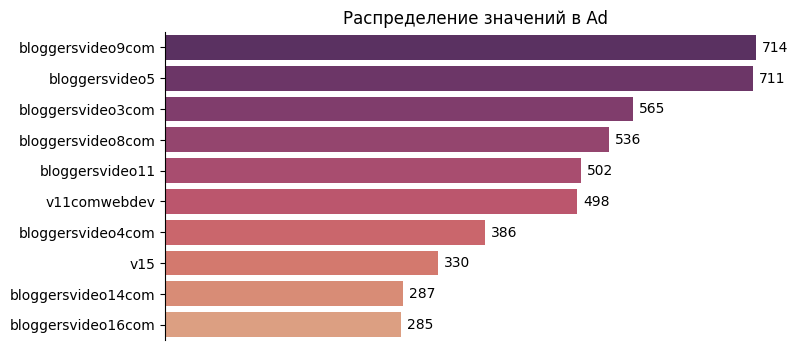


Процентное распределение:
Ad
bloggersvideo9com     5.180670
bloggersvideo5        5.158903
bloggersvideo3com     4.099550
bloggersvideo8com     3.889131
bloggersvideo11       3.642432
v11comwebdev          3.613409
bloggersvideo4com     2.800755
v15                   2.394428
bloggersvideo14com    2.082426
bloggersvideo16com    2.067915
bloggersvideo5com     2.031635
v7com                 2.031635
v3com                 1.850239
bloggersvideo17com    1.828472
bloggersvideo1com     1.813960
v9com                 1.712378
v6com                 1.654332
v4com                 1.516471
v15com                1.494703
bloggersvideo2com     1.487447
Name: proportion, dtype: float64


In [42]:
# Категориальные колонки для анализа
columns = ['Source', 'Campaign', 'AdGroup', 'Ad']

for column in columns:
    print(f"\n\033[1m\033[34mАнализ столбца: {column}\033[0m")
    print(spend_df[column].value_counts().head(20))


    # Визуализация
    plt.figure(figsize=(8, 4))
    ax = sns.countplot(y=spend_df[column], order=spend_df[column].value_counts().index[:10], palette="flare_r", legend=False)

    # Добавление значений на полосы
    for p in ax.patches:
        width = p.get_width()
        plt.text(width + max(spend_df[column].value_counts()) * 0.01, p.get_y() + p.get_height()/2, f'{int(width)}', va='center')

    # Убираем границы
    for spine in ['top', 'right','bottom']:
        ax.spines[spine].set_visible(False)


    plt.title(f"Распределение значений в {column}")
    plt.xlabel("")
    ax.set_xticks([])
    plt.ylabel('')
    plt.show()

    print("\nПроцентное распределение:")
    print(spend_df[column].value_counts(normalize=True).head(20) * 100)

In [43]:
spend_overall = spend_df.groupby('Source')[['Impressions','Clicks','Spend']].sum()
spend_overall['Conversion'] = spend_overall['Clicks']/spend_overall['Impressions']
cv_sorted = spend_overall.sort_values(by='Conversion', ascending=False)
cv_sorted

,Impressions,Clicks,Spend,Conversion
Source,,,,
CRM,0,7995,0.00,inf
Partnership,0,350,0.00,inf
Organic,0,59089,0.00,inf
Offline,0,57,0.00,inf
SMM,23772,11521,7269.52,0.484646
Telegram posts,705415,16777,6860.36,0.023783
Bloggers,738460,14250,13439.00,0.019297
Facebook Ads,2850200,48133,33754.72,0.016888
Webinar,301670,3241,2874.04,0.010744


In [44]:
duplicates = spend_df.duplicated(keep=False)
only_duplicates = spend_df[duplicates]
print(only_duplicates)

Empty DataFrame
Columns: [Date, Source, Campaign, Impressions, Spend, Clicks, AdGroup, Ad]
Index: []


# **Deals** Описательная статистика

In [45]:
deals_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21291 entries, 0 to 21592
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Id                   21291 non-null  object        
 1   Deal Owner Name      21291 non-null  object        
 2   Closing Date         14494 non-null  datetime64[ns]
 3   Quality              21291 non-null  object        
 4   Stage                21291 non-null  object        
 5   Lost Reason          21291 non-null  object        
 6   Campaign             21291 non-null  object        
 7   SLA                  15276 non-null  float64       
 8   Content              13938 non-null  object        
 9   Term                 12242 non-null  object        
 10  Source               21291 non-null  object        
 11  Payment Type         719 non-null    object        
 12  Product              3536 non-null   object        
 13  Education Type       3247 non-null  

In [46]:
# сводная статистика только для числовых столбцов
numeric_stats = deals_df.select_dtypes(include=['number']).describe()

display(numeric_stats)

,SLA,Course duration,Months of study,Initial Amount Paid,Offer Total Amount,Deutsch Category
count,15276.000000,3531.000000,3244.000000,4102.000000,4122.000000,1170.000000
mean,1930.794632,10.197111,3.487361,935.097026,7116.877487,3.030769
std,12321.257991,1.835965,1.937863,1405.833982,4648.619831,0.683980
min,0.050000,6.000000,1.000000,0.000000,0.000000,1.000000
25%,73.145000,11.000000,3.000000,300.000000,3000.000000,3.000000
50%,331.850000,11.000000,3.000000,1000.000000,11000.000000,3.000000
75%,936.707500,11.000000,3.000000,1000.000000,11000.000000,3.000000
max,448474.400000,11.000000,11.000000,11500.000000,11500.000000,6.000000


In [47]:
categorical_columns = deals_df.select_dtypes(include=['object']).columns.tolist()
categorical_columns

['Id',
 'Deal Owner Name',
 'Quality',
 'Stage',
 'Lost Reason',
 'Campaign',
 'Content',
 'Term',
 'Source',
 'Payment Type',
 'Product',
 'Education Type',
 'Contact Name',
 'City',
 'Country',
 'Deutsch Level']

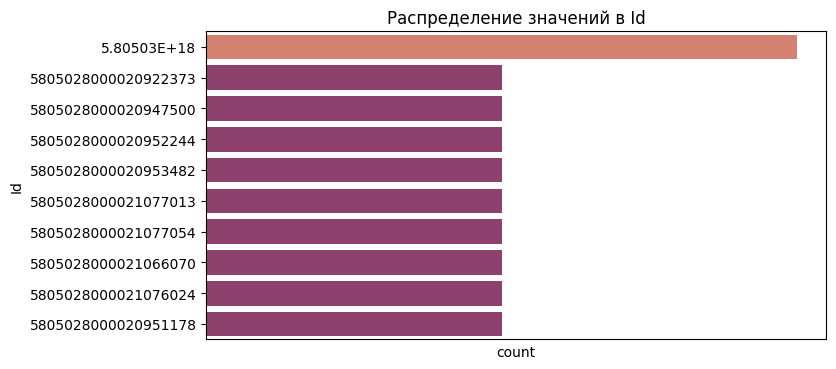


Анализ столбца: Id
Id
5.80503E+18            2
5805028000020922373    1
5805028000020947500    1
5805028000020952244    1
5805028000020953482    1
5805028000021077013    1
5805028000021077054    1
5805028000021066070    1
5805028000021076024    1
5805028000020951178    1
Name: count, dtype: int64

Процентное распределение:
Id
5.80503E+18            0.009394
5805028000020922373    0.004697
5805028000020947500    0.004697
5805028000020952244    0.004697
5805028000020953482    0.004697
5805028000021077013    0.004697
5805028000021077054    0.004697
5805028000021066070    0.004697
5805028000021076024    0.004697
5805028000020951178    0.004697
Name: proportion, dtype: float64


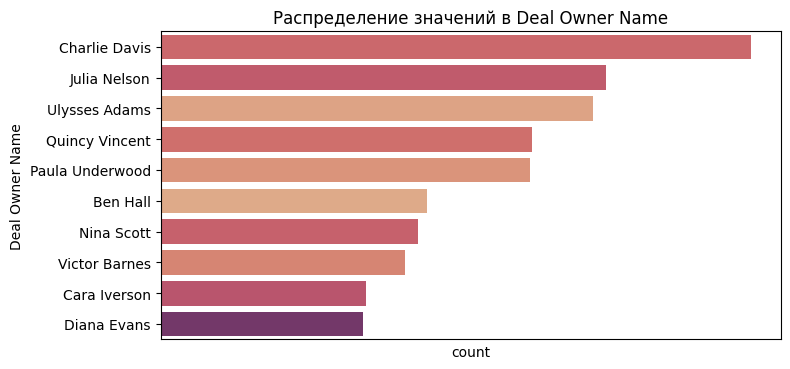


Анализ столбца: Deal Owner Name
Deal Owner Name
Charlie Davis      2932
Julia Nelson       2212
Ulysses Adams      2149
Quincy Vincent     1847
Paula Underwood    1834
Ben Hall           1325
Nina Scott         1276
Victor Barnes      1214
Cara Iverson       1022
Diana Evans        1007
Name: count, dtype: int64

Процентное распределение:
Deal Owner Name
Charlie Davis      13.771077
Julia Nelson       10.389366
Ulysses Adams      10.093467
Quincy Vincent      8.675027
Paula Underwood     8.613968
Ben Hall            6.223287
Nina Scott          5.993143
Victor Barnes       5.701940
Cara Iverson        4.800150
Diana Evans         4.729698
Name: proportion, dtype: float64


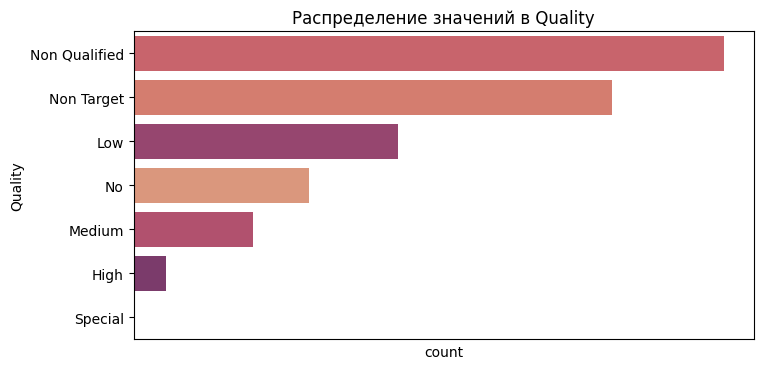


Анализ столбца: Quality
Quality
Non Qualified    7567
Non Target       6129
Low              3394
No               2252
Medium           1526
High              420
Special             3
Name: count, dtype: int64

Процентное распределение:
Quality
Non Qualified    35.540839
Non Target       28.786811
Low              15.941008
No               10.577239
Medium            7.167348
High              1.972665
Special           0.014090
Name: proportion, dtype: float64


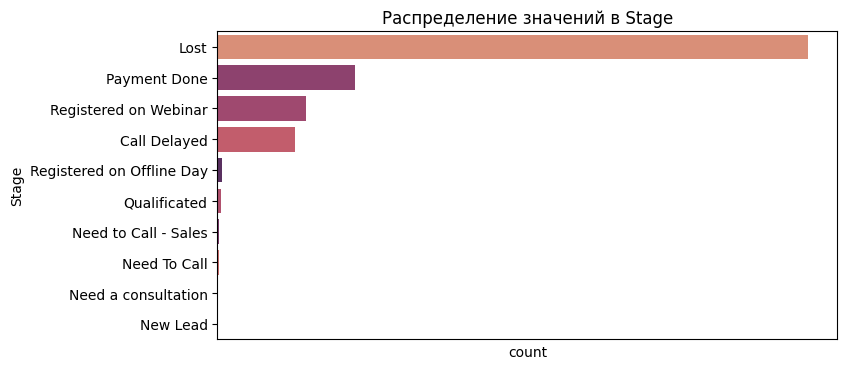


Анализ столбца: Stage
Stage
Lost                         13875
Payment Done                  3232
Registered on Webinar         2071
Call Delayed                  1827
Registered on Offline Day       99
Qualificated                    91
Need to Call - Sales            32
Need To Call                    31
Need a consultation             23
New Lead                         6
Name: count, dtype: int64

Процентное распределение:
Stage
Lost                         65.168381
Payment Done                 15.180123
Registered on Webinar         9.727115
Call Delayed                  8.581091
Registered on Offline Day     0.464985
Qualificated                  0.427411
Need to Call - Sales          0.150298
Need To Call                  0.145601
Need a consultation           0.108027
New Lead                      0.028181
Name: proportion, dtype: float64


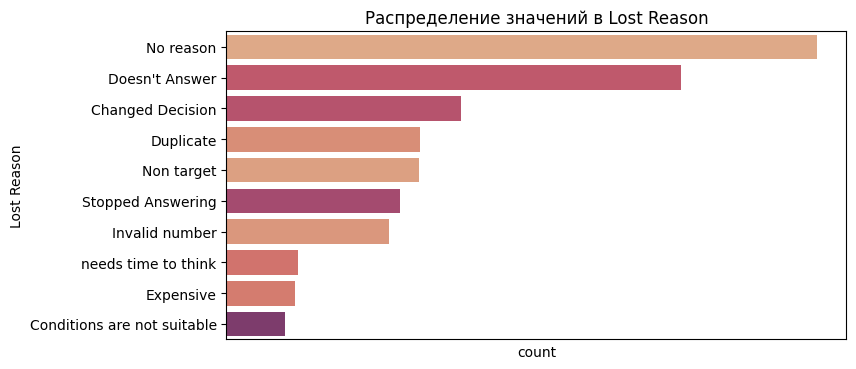


Анализ столбца: Lost Reason
Lost Reason
No reason                      5333
Doesn't Answer                 4107
Changed Decision               2118
Duplicate                      1747
Non target                     1736
Stopped Answering              1572
Invalid number                 1468
needs time to think             650
Expensive                       624
Conditions are not suitable     527
Name: count, dtype: int64

Процентное распределение:
Lost Reason
No reason                      25.048142
Doesn't Answer                 19.289841
Changed Decision                9.947865
Duplicate                       8.205345
Non target                      8.153680
Stopped Answering               7.383401
Invalid number                  6.894932
needs time to think             3.052933
Expensive                       2.930816
Conditions are not suitable     2.475224
Name: proportion, dtype: float64


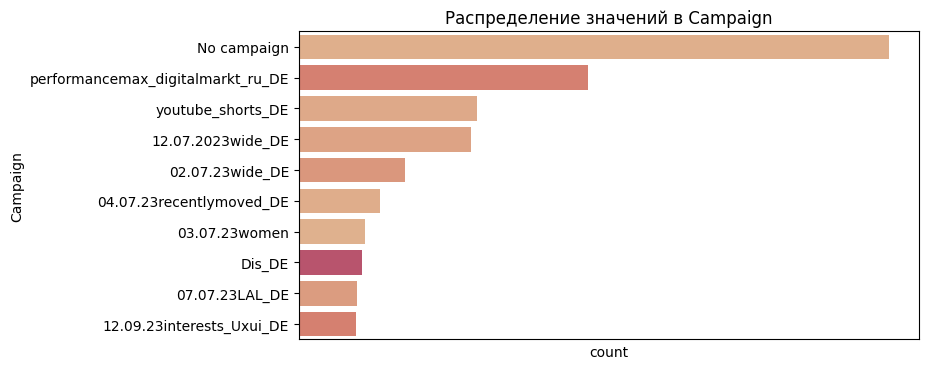


Анализ столбца: Campaign
Campaign
No campaign                          5408
performancemax_digitalmarkt_ru_DE    2647
youtube_shorts_DE                    1633
12.07.2023wide_DE                    1574
02.07.23wide_DE                       971
04.07.23recentlymoved_DE              742
03.07.23women                         607
Dis_DE                                580
07.07.23LAL_DE                        535
12.09.23interests_Uxui_DE             528
Name: count, dtype: int64

Процентное распределение:
Campaign
No campaign                          25.400404
performancemax_digitalmarkt_ru_DE    12.432483
youtube_shorts_DE                     7.669907
12.07.2023wide_DE                     7.392795
02.07.23wide_DE                       4.560612
04.07.23recentlymoved_DE              3.485041
03.07.23women                         2.850970
Dis_DE                                2.724156
07.07.23LAL_DE                        2.512799
12.09.23interests_Uxui_DE             2.479921
Name: proport

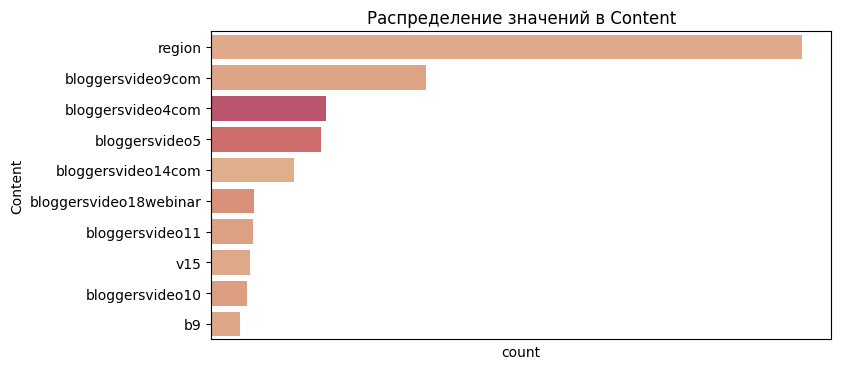


Анализ столбца: Content
Content
region                    4176
bloggersvideo9com         1517
bloggersvideo4com          815
bloggersvideo5             774
bloggersvideo14com         589
bloggersvideo18webinar     303
bloggersvideo11            295
v15                        276
bloggersvideo10            252
b9                         206
Name: count, dtype: int64

Процентное распределение:
Content
region                    29.961257
bloggersvideo9com         10.883914
bloggersvideo4com          5.847324
bloggersvideo5             5.553164
bloggersvideo14com         4.225857
bloggersvideo18webinar     2.173913
bloggersvideo11            2.116516
v15                        1.980198
bloggersvideo10            1.808007
b9                         1.477974
Name: proportion, dtype: float64


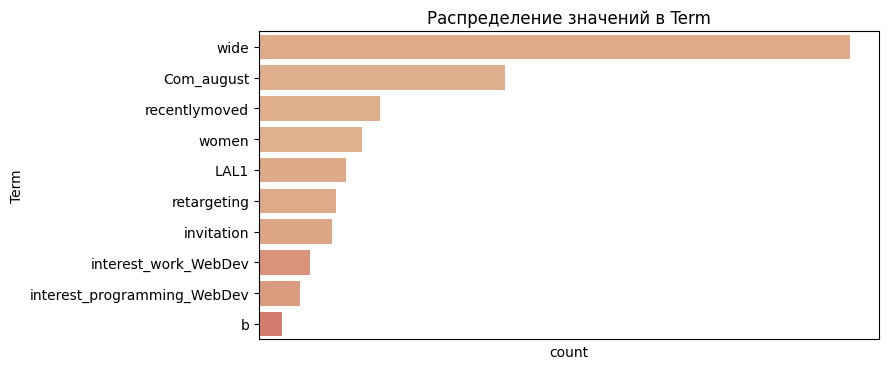


Анализ столбца: Term
Term
wide                           3668
Com_august                     1526
recentlymoved                   749
women                           638
LAL1                            541
retargeting                     477
invitation                      453
interest_work_WebDev            314
interest_programming_WebDev     257
b                               144
Name: count, dtype: int64

Процентное распределение:
Term
wide                           29.962424
Com_august                     12.465283
recentlymoved                   6.118281
women                           5.211567
LAL1                            4.419213
retargeting                     3.896422
invitation                      3.700376
interest_work_WebDev            2.564940
interest_programming_WebDev     2.099330
b                               1.176278
Name: proportion, dtype: float64


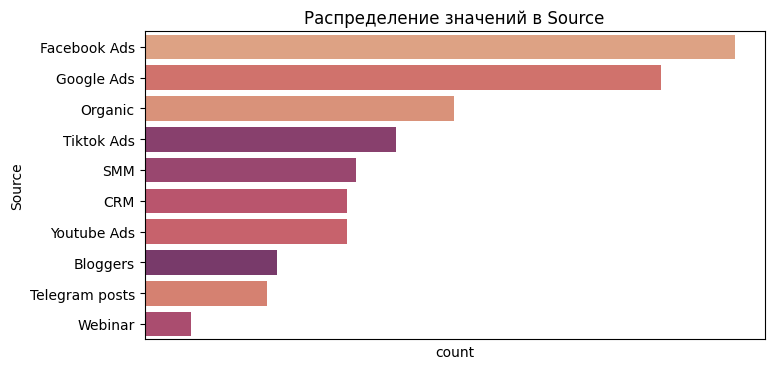


Анализ столбца: Source
Source
Facebook Ads      4817
Google Ads        4217
Organic           2524
Tiktok Ads        2048
SMM               1727
CRM               1654
Youtube Ads       1654
Bloggers          1081
Telegram posts     998
Webinar            379
Name: count, dtype: int64

Процентное распределение:
Source
Facebook Ads      22.624583
Google Ads        19.806491
Organic           11.854774
Tiktok Ads         9.619088
SMM                8.111409
CRM                7.768541
Youtube Ads        7.768541
Bloggers           5.077263
Telegram posts     4.687427
Webinar            1.780095
Name: proportion, dtype: float64


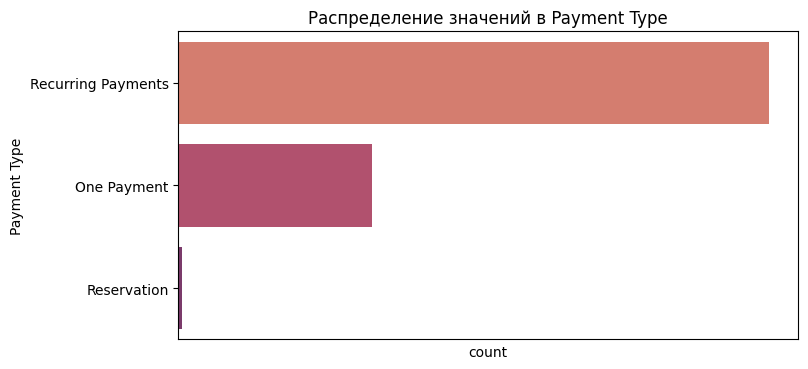


Анализ столбца: Payment Type
Payment Type
Recurring Payments    539
One Payment           177
Reservation             3
Name: count, dtype: int64

Процентное распределение:
Payment Type
Recurring Payments    74.965229
One Payment           24.617524
Reservation            0.417246
Name: proportion, dtype: float64


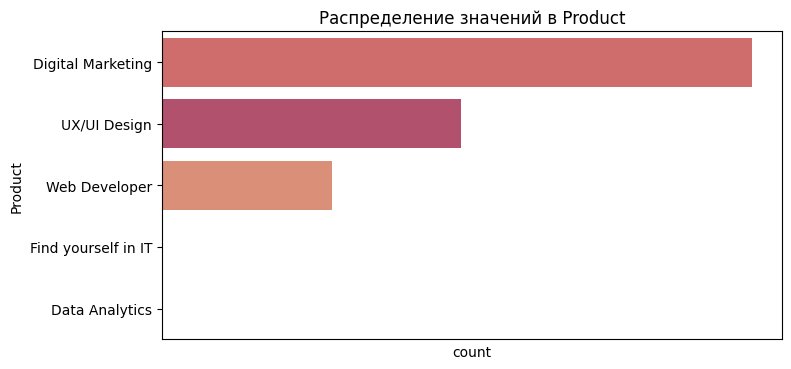


Анализ столбца: Product
Product
Digital Marketing      1967
UX/UI Design            997
Web Developer           567
Find yourself in IT       4
Data Analytics            1
Name: count, dtype: int64

Процентное распределение:
Product
Digital Marketing      55.627828
UX/UI Design           28.195701
Web Developer          16.035068
Find yourself in IT     0.113122
Data Analytics          0.028281
Name: proportion, dtype: float64


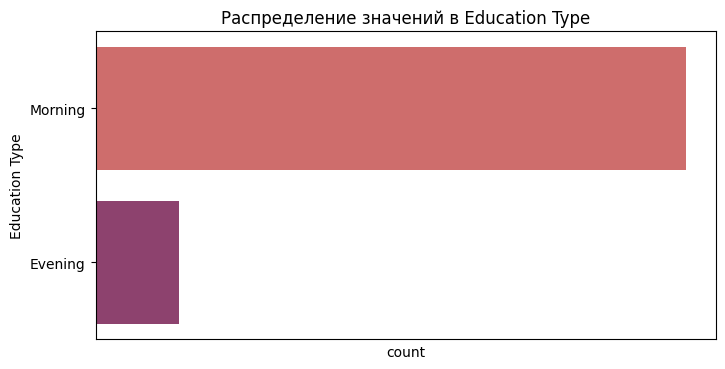


Анализ столбца: Education Type
Education Type
Morning    2846
Evening     401
Name: count, dtype: int64

Процентное распределение:
Education Type
Morning    87.650139
Evening    12.349861
Name: proportion, dtype: float64


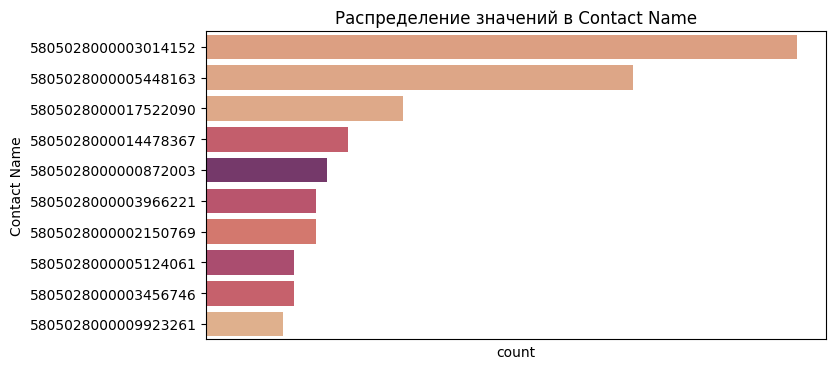


Анализ столбца: Contact Name
Contact Name
5805028000003014152    54
5805028000005448163    39
5805028000017522090    18
5805028000014478367    13
5805028000000872003    11
5805028000003966221    10
5805028000002150769    10
5805028000005124061     8
5805028000003456746     8
5805028000009923261     7
Name: count, dtype: int64

Процентное распределение:
Contact Name
5805028000003014152    0.253628
5805028000005448163    0.183176
5805028000017522090    0.084543
5805028000014478367    0.061059
5805028000000872003    0.051665
5805028000003966221    0.046968
5805028000002150769    0.046968
5805028000005124061    0.037575
5805028000003456746    0.037575
5805028000009923261    0.032878
Name: proportion, dtype: float64


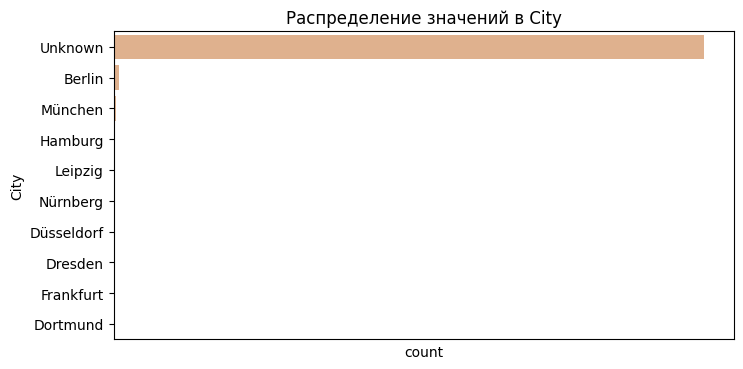


Анализ столбца: City
City
Unknown       19160
Berlin          181
München          73
Hamburg          62
Leipzig          45
Nürnberg         42
Düsseldorf       32
Dresden          28
Frankfurt        27
Dortmund         26
Name: count, dtype: int64

Процентное распределение:
City
Unknown       89.991076
Berlin         0.850124
München        0.342868
Hamburg        0.291203
Leipzig        0.211357
Nürnberg       0.197266
Düsseldorf     0.150298
Dresden        0.131511
Frankfurt      0.126814
Dortmund       0.122117
Name: proportion, dtype: float64


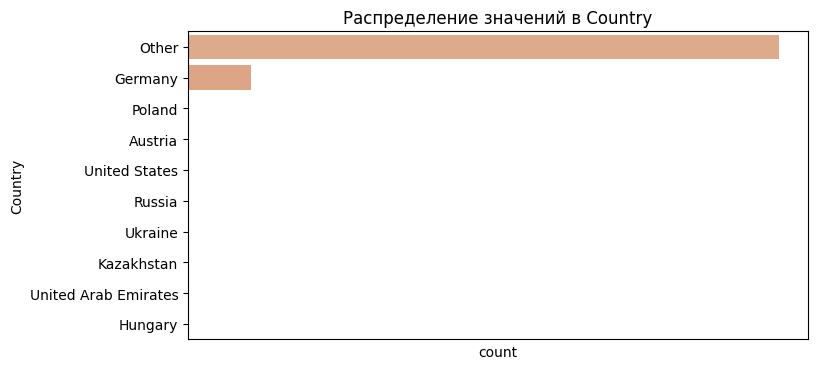


Анализ столбца: Country
Country
Other                   19160
Germany                  2046
Poland                     22
Austria                    15
United States               6
Russia                      6
Ukraine                     5
Kazakhstan                  4
United Arab Emirates        2
Hungary                     2
Name: count, dtype: int64

Процентное распределение:
Country
Other                   89.991076
Germany                  9.609694
Poland                   0.103330
Austria                  0.070452
United States            0.028181
Russia                   0.028181
Ukraine                  0.023484
Kazakhstan               0.018787
United Arab Emirates     0.009394
Hungary                  0.009394
Name: proportion, dtype: float64


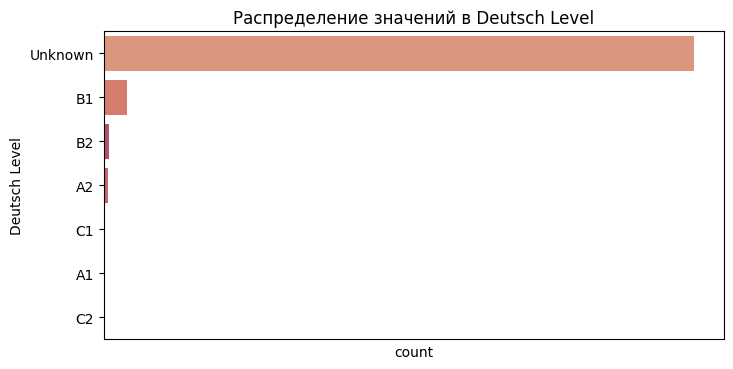


Анализ столбца: Deutsch Level
Deutsch Level
Unknown    20121
B1           802
B2           170
A2           143
C1            26
A1            26
C2             3
Name: count, dtype: int64

Процентное распределение:
Deutsch Level
Unknown    94.504720
B1          3.766850
B2          0.798459
A2          0.671645
C1          0.122117
A1          0.122117
C2          0.014090
Name: proportion, dtype: float64


In [48]:
# Категориальные колонки для анализа
categorical_columns = deals_df.select_dtypes(include=['object']).columns

# Создание графиков
for column in categorical_columns:
    plt.figure(figsize=(8, 4))
    ax = sns.countplot(y=deals_df[column],
                       order=deals_df[column].value_counts().index[:10],
                       hue = deals_df[column],
                       palette="flare",
                       legend=False)
    ax.set_title(f"Распределение значений в {column}")
    ax.set_xticks([])
    ax.set_ylabel(column)
    ax.grid(axis='x', linestyle='--', alpha=0.7, color='gray')
    plt.show()

    # Вывод описания сразу после графика
    print(f"\n\033[1m\033[34mАнализ столбца: {column}\033[0m")
    print(deals_df[column].value_counts().head(10))
    print("\nПроцентное распределение:")
    print(deals_df[column].value_counts(normalize=True).head(10) * 100)


Очень странный клиент

In [49]:
filtered_df = deals_df[deals_df["Contact Name"] == "5805028000003014152"]

# Вывод результата
filtered_df

,Id,Deal Owner Name,Closing Date,Quality,Stage,Lost Reason,Campaign,SLA,Content,Term,...,Created Time,Course duration,Months of study,Initial Amount Paid,Offer Total Amount,Contact Name,City,Country,Deutsch Level,Deutsch Category
1770,5805028000052665863,Julia Nelson,2024-05-31,Non Qualified,Lost,Inadequate,performancemax_eng_DE,NaN,region,None,...,2024-05-30 22:26:00,NaN,NaN,NaN,NaN,5805028000003014152,Unknown,Other,Unknown,NaN
2413,5805028000050592381,Julia Nelson,2024-05-18,Non Qualified,Lost,Duplicate,performancemax_eng_DE,NaN,region,None,...,2024-05-18 01:16:00,NaN,NaN,NaN,NaN,5805028000003014152,Unknown,Other,Unknown,NaN
2963,5805028000048942624,Julia Nelson,2024-05-10,Non Target,Lost,Inadequate,performancemax_digitalmarkt_ru_DE,NaN,region,None,...,2024-05-09 11:51:00,NaN,NaN,NaN,NaN,5805028000003014152,Unknown,Other,Unknown,NaN
3723,5805028000047355322,Julia Nelson,2024-04-30,Non Qualified,Lost,Inadequate,youtube_shorts_DE,NaN,bloggersvideo11,Com_august,...,2024-04-30 00:27:00,NaN,NaN,NaN,NaN,5805028000003014152,Unknown,Other,Unknown,NaN
5191,5805028000043884157,Julia Nelson,2024-04-16,Non Qualified,Lost,Duplicate,performancemax_digitalmarkt_ru_DE,NaN,region,None,...,2024-04-15 14:02:00,NaN,NaN,NaN,NaN,5805028000003014152,Unknown,Other,Unknown,NaN
5483,5805028000043624701,Julia Nelson,2024-04-13,Non Qualified,Lost,Inadequate,performancemax_digitalmarkt_ru_DE,NaN,region,None,...,2024-04-13 07:51:00,NaN,NaN,NaN,NaN,5805028000003014152,Unknown,Other,Unknown,NaN
7306,5805028000039618019,Julia Nelson,2024-03-25,Non Qualified,Lost,Inadequate,youtube_shorts_DE,NaN,video1com_new,Com_august,...,2024-03-25 11:01:00,NaN,NaN,NaN,NaN,5805028000003014152,Unknown,Other,Unknown,NaN
8849,5805028000035474414,Julia Nelson,2024-03-03,Non Qualified,Lost,Inadequate,youtube_shorts_DE,NaN,bloggersvideo10,Com_august,...,2024-03-03 18:04:00,NaN,NaN,NaN,NaN,5805028000003014152,Unknown,Other,Unknown,NaN
8883,5805028000035474007,Julia Nelson,2024-03-03,Non Qualified,Lost,Inadequate,performancemax_digitalmarkt_ru_DE,389.77,region,None,...,2024-03-03 08:30:00,NaN,NaN,NaN,NaN,5805028000003014152,Unknown,Other,Unknown,NaN
9436,5805028000033772168,Julia Nelson,2024-02-23,Non Target,Lost,Inadequate,youtube_shorts_DE,NaN,bloggersvideo9com,Com_august,...,2024-02-23 17:43:00,NaN,NaN,NaN,NaN,5805028000003014152,Unknown,Other,Unknown,NaN


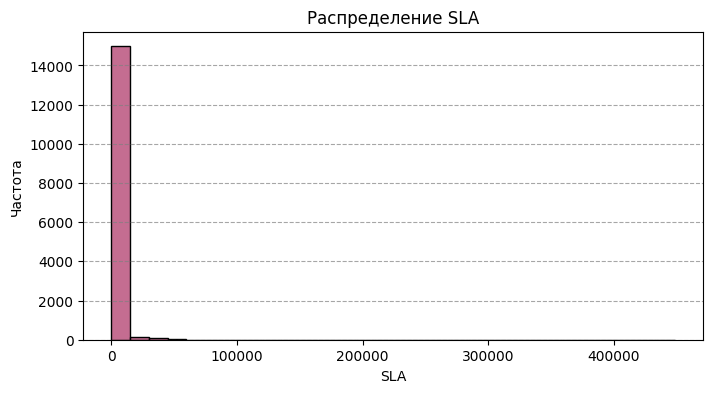


Статистика для SLA:
count     15276.000000
mean       1930.794632
std       12321.257991
min           0.050000
25%          73.145000
50%         331.850000
75%         936.707500
max      448474.400000
Name: SLA, dtype: float64


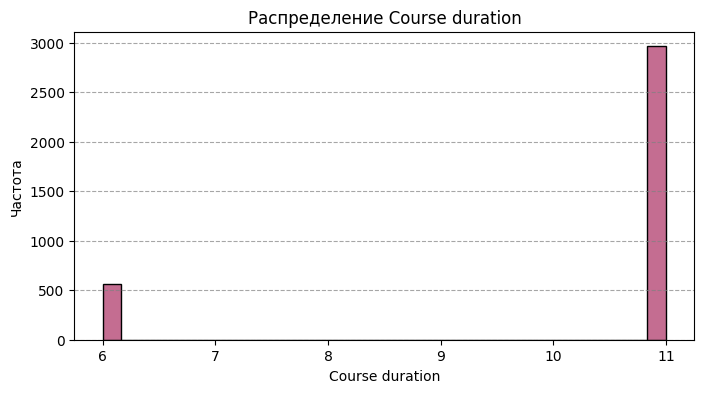


Статистика для Course duration:
count    3531.000000
mean       10.197111
std         1.835965
min         6.000000
25%        11.000000
50%        11.000000
75%        11.000000
max        11.000000
Name: Course duration, dtype: float64


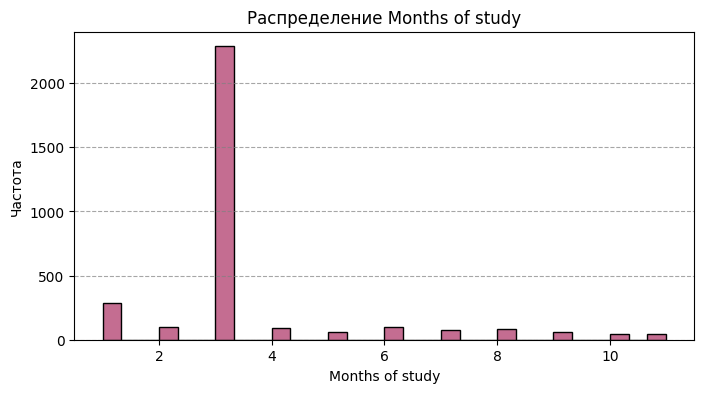


Статистика для Months of study:
count    3244.000000
mean        3.487361
std         1.937863
min         1.000000
25%         3.000000
50%         3.000000
75%         3.000000
max        11.000000
Name: Months of study, dtype: float64


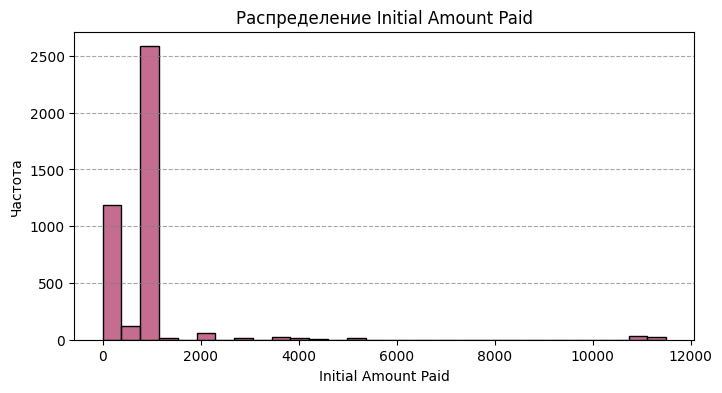


Статистика для Initial Amount Paid:
count     4102.000000
mean       935.097026
std       1405.833982
min          0.000000
25%        300.000000
50%       1000.000000
75%       1000.000000
max      11500.000000
Name: Initial Amount Paid, dtype: float64


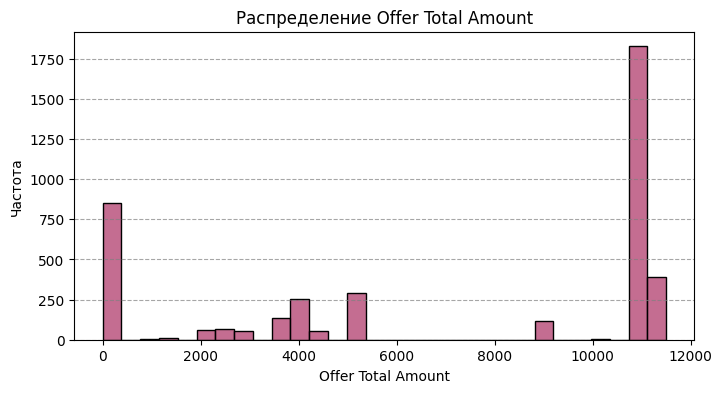


Статистика для Offer Total Amount:
count     4122.000000
mean      7116.877487
std       4648.619831
min          0.000000
25%       3000.000000
50%      11000.000000
75%      11000.000000
max      11500.000000
Name: Offer Total Amount, dtype: float64


In [50]:
# Визуализация числовых данных
numerical_columns = deals_df.select_dtypes(include=['float64', 'int64']).columns
numerical_columns = [col for col in numerical_columns if col != 'Deutsch Category']

for column in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(deals_df[column],
                 bins=30,
                 color=sns.color_palette("flare_r")[2])
    plt.title(f"Распределение {column}")
    plt.xlabel(column)
    plt.ylabel("Частота")
    plt.grid(axis='y', linestyle='--', alpha=0.7, color='gray')
    plt.show()

    # Вывод описательной статистики
    print(f"\n\033[1m\033[34mСтатистика для {column}:\033[0m")
    print(deals_df[column].describe())

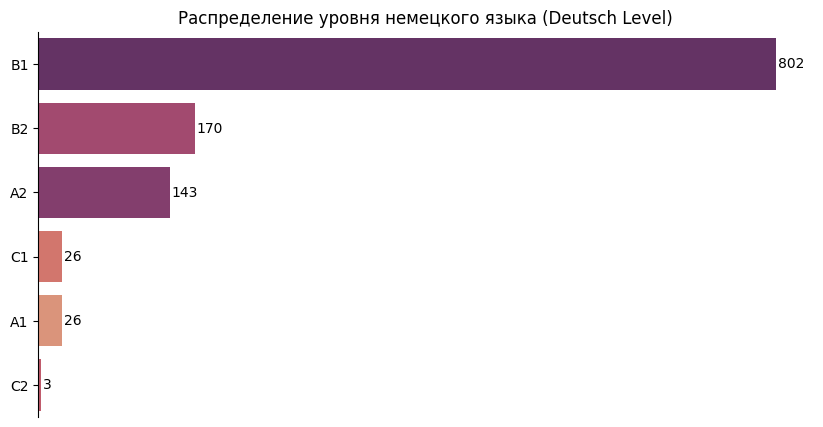

In [51]:
filtered_df = deals_df[deals_df['Deutsch Level'] != 'Unknown']

plt.figure(figsize=(10, 5))
ax = sns.countplot(data=filtered_df,
                   y='Deutsch Level',
                   order=filtered_df['Deutsch Level'].value_counts().index,
                   hue='Deutsch Level',
                   palette='flare_r',
                   legend = False)

# Добавление значений на полосы
for p in ax.patches:
    width = p.get_width()
    ax.text(width + 2, p.get_y() + p.get_height()/2, int(width), va='center', fontsize=10)

 # Убираем границы
    for spine in ['top', 'right','bottom']:
        ax.spines[spine].set_visible(False)


plt.title('Распределение уровня немецкого языка (Deutsch Level)')
plt.xlabel('')
ax.set_xticks([])
plt.ylabel('')


plt.grid(axis='x', linestyle='--', alpha=0.7, color='gray')
plt.show()


<Axes: xlabel='Closing Month'>

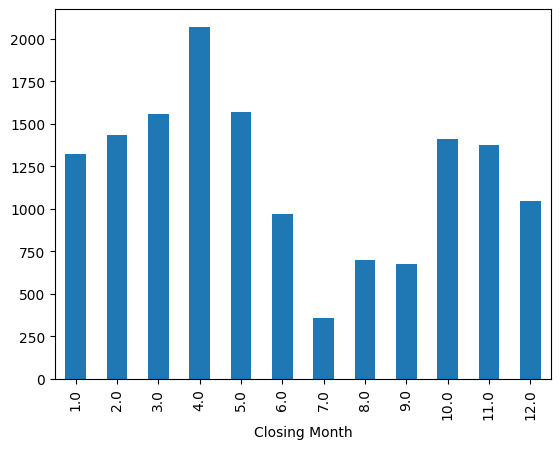

In [52]:
# Количество сделок по месяцам
deals_df['Closing Month'] = deals_df['Closing Date'].dt.month
deals_df['Closing Month'].value_counts().sort_index().plot(kind='bar')

In [53]:
deals_df[(deals_df['Stage'] == 'Payment Done') & (deals_df['Payment Type'].isna()) & (deals_df['Months of study'] > 1)]['Contact Name'].count()

np.int64(2500)

In [54]:
deals_df[(deals_df['Stage'] == 'Payment Done') & (deals_df['Payment Type'].isna()) & (deals_df['Initial Amount Paid']== deals_df['Offer Total Amount'])]['Contact Name'].count()

np.int64(0)

In [55]:
deals_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21291 entries, 0 to 21592
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Id                   21291 non-null  object        
 1   Deal Owner Name      21291 non-null  object        
 2   Closing Date         14494 non-null  datetime64[ns]
 3   Quality              21291 non-null  object        
 4   Stage                21291 non-null  object        
 5   Lost Reason          21291 non-null  object        
 6   Campaign             21291 non-null  object        
 7   SLA                  15276 non-null  float64       
 8   Content              13938 non-null  object        
 9   Term                 12242 non-null  object        
 10  Source               21291 non-null  object        
 11  Payment Type         719 non-null    object        
 12  Product              3536 non-null   object        
 13  Education Type       3247 non-null  

In [56]:
deals_df['Stage'].value_counts()

,count
Stage,
Lost,13875
Payment Done,3232
Registered on Webinar,2071
Call Delayed,1827
Registered on Offline Day,99
Qualificated,91
Need to Call - Sales,32
Need To Call,31
Need a consultation,23


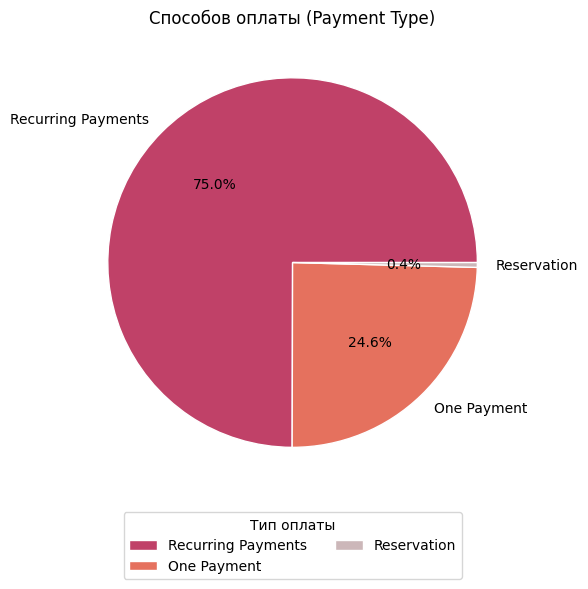

In [57]:
# Удаляем Unknown из данных
filtered_df = deals_df[deals_df['Payment Type'] != 'Unknown']

# Группировка
payment_counts = filtered_df['Payment Type'].value_counts()
labels = payment_counts.index
sizes = payment_counts.values

# Цвета
colors = ['#c04168', '#e5715e','#ccb7b9']

# Построение круговой диаграммы
plt.figure(figsize=(8, 6))
plt.pie(sizes,
        labels=labels,
        autopct='%1.1f%%',
        colors=colors,
        wedgeprops={'edgecolor': 'white'})

plt.title('Способов оплаты (Payment Type)')

# Легенда снизу
plt.legend(title='Тип оплаты', loc='lower center', bbox_to_anchor=(0.5, -0.2), ncol=2)

plt.tight_layout()
plt.show()

In [58]:
# Фильтрация по типу оплаты One Payment
one_payment_df = deals_df[deals_df['Payment Type'] == 'One Payment'].copy()

# Расчёт общей суммы: Initial Amount Paid * Months of study
one_payment_sum = (one_payment_df['Initial Amount Paid'] * one_payment_df['Months of study']).sum()

print(f"Сумма платежей для One Payment: {round(one_payment_sum, 2)}")

Сумма платежей для One Payment: 2465002.0


In [59]:
# Фильтрация по типу оплаты Recurring Payments
recurring_payments_df = deals_df[deals_df['Payment Type'] == 'Recurring Payments'].copy()

# Расчёт общей суммы: Initial Amount Paid * Months of study
recurring_payments_sum = (recurring_payments_df['Initial Amount Paid'] * recurring_payments_df['Months of study']).sum()

print(f"Сумма платежей для Recurring Payments: {round(recurring_payments_sum, 2)}")

Сумма платежей для Recurring Payments: 971112.0


In [60]:
one_payment_sum = deals_df[deals_df['Payment Type'] == 'Recurring Payments']['Offer Total Amount'].sum()
one_payment_sum

np.float64(2499514.5)

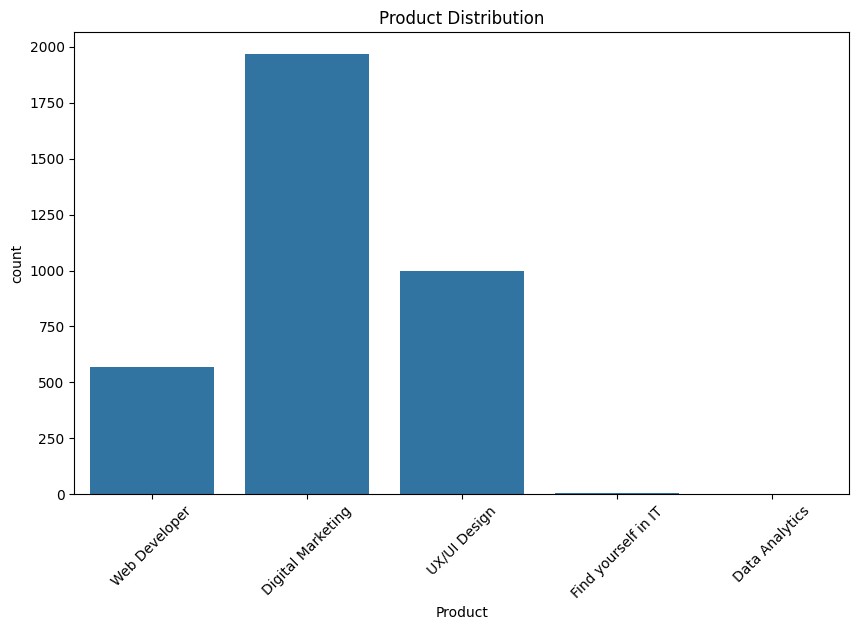

In [61]:
filtered_df = deals_df[deals_df['Product'] != 'Unknown']

plt.figure(figsize=(10, 6))
sns.countplot(data=filtered_df, x='Product')
plt.xticks(rotation=45)
plt.title('Product Distribution')
plt.show()

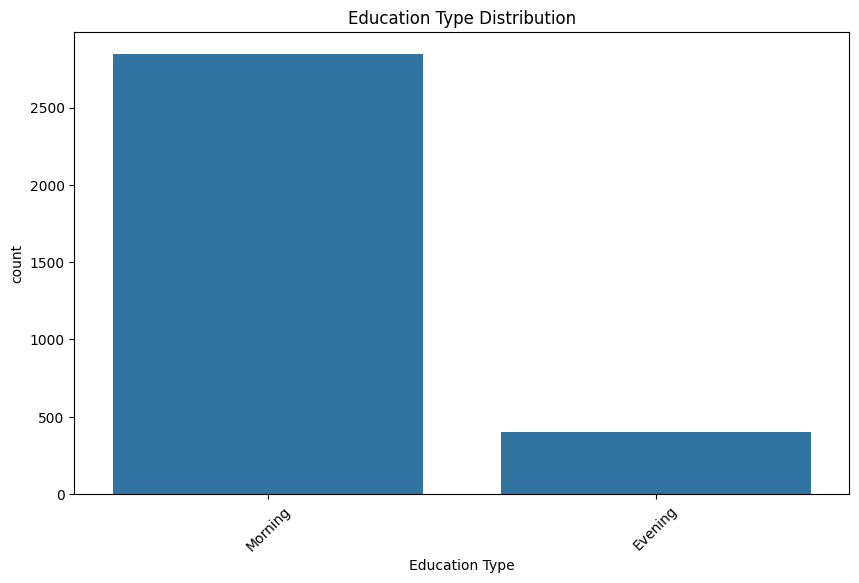

In [62]:
filtered_df = deals_df[deals_df['Education Type'] != 'No info']

plt.figure(figsize=(10, 6))
sns.countplot(data=filtered_df, x='Education Type')
plt.xticks(rotation=45)
plt.title('Education Type Distribution')

plt.show()

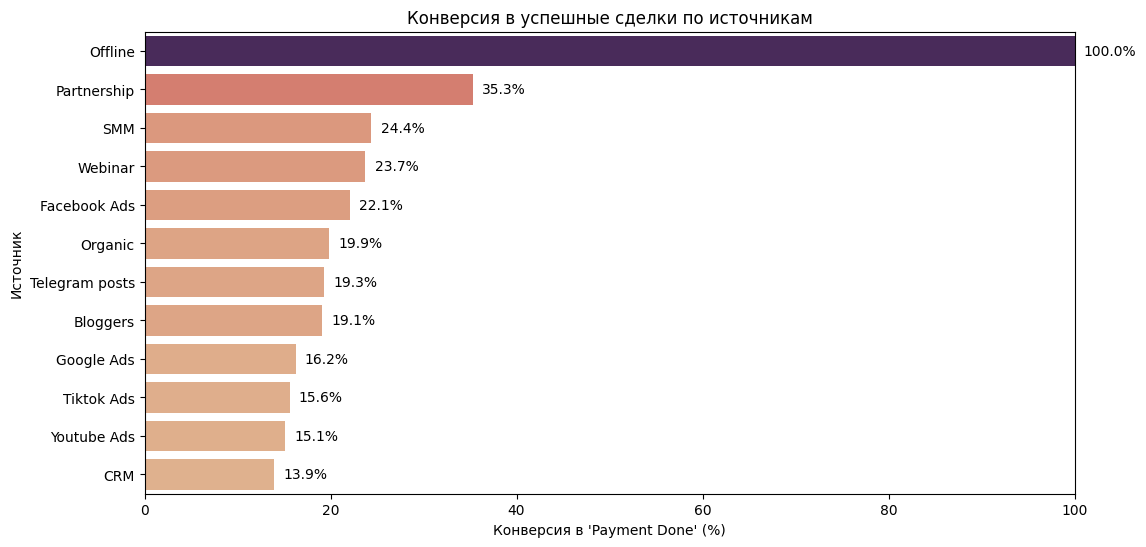

In [63]:
# Фильтруем только успешные и неуспешные сделки
source_analysis = deals_df[deals_df['Stage'].isin(['Payment Done', 'Lost'])]

# Проверяем, пуст ли DataFrame
if source_analysis.empty:
    print("DataFrame source_analysis is empty. Check the values in 'Stage' column.")
else:
    # Подсчёт количества успешных и неуспешных сделок по источникам
    source_counts = source_analysis.groupby(['Source', 'Stage'])['Id'].count().unstack()

    # Заполняем NaN нулями (если у источника нет сделок одного из типов)
    source_counts = source_counts.fillna(0)

    # Добавляем колонку с конверсией в успешные сделки
    source_counts['Conversion Rate (%)'] = (source_counts['Payment Done'] / (source_counts['Payment Done'] + source_counts['Lost'])) * 100

    # Сортируем по конверсии
    source_counts = source_counts.sort_values(by='Conversion Rate (%)', ascending=False)

    # Визуализация
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(y=source_counts.index,
                     x=source_counts['Conversion Rate (%)'],
                     hue=source_counts['Conversion Rate (%)'],
                     palette="flare",
                     legend = False)

    # Добавляем подписи значений на график
    for p in ax.patches:
        plt.text(p.get_width() + 1, p.get_y() + p.get_height()/2, f'{p.get_width():.1f}%', va='center')

    plt.title("Конверсия в успешные сделки по источникам")
    plt.xlabel("Конверсия в 'Payment Done' (%)")
    plt.ylabel("Источник")
    plt.xlim(0, 100)  # Ограничение оси для наглядности
    plt.show()

In [64]:
deals_df.drop(columns=['Closing Month'], inplace=True)

In [65]:
duplicates = deals_df.duplicated(keep=False)
only_duplicates = deals_df[duplicates]
print(only_duplicates)

Empty DataFrame
Columns: [Id, Deal Owner Name, Closing Date, Quality, Stage, Lost Reason, Campaign, SLA, Content, Term, Source, Payment Type, Product, Education Type, Created Time, Course duration, Months of study, Initial Amount Paid, Offer Total Amount, Contact Name, City, Country, Deutsch Level, Deutsch Category]
Index: []

[0 rows x 24 columns]


# Объединение таблиц **Deals** и **Spend** по

('Campaign', 'Ad' = 'Content', 'AdGroup' = 'Term' )

In [66]:
# Агрегация по ключам
spend_agg = spend_df.groupby(['Campaign', 'Ad', 'AdGroup'], as_index=False).agg({
    'Impressions': 'sum',
    'Clicks': 'sum',
    'Spend': 'sum'
})

In [67]:
deals_spend = deals_df.merge(
    spend_agg,
    left_on=['Campaign', 'Content', 'Term'],
    right_on=['Campaign', 'Ad', 'AdGroup'],
    how='left'
)

In [68]:
deals_spend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21291 entries, 0 to 21290
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Id                   21291 non-null  object        
 1   Deal Owner Name      21291 non-null  object        
 2   Closing Date         14494 non-null  datetime64[ns]
 3   Quality              21291 non-null  object        
 4   Stage                21291 non-null  object        
 5   Lost Reason          21291 non-null  object        
 6   Campaign             21291 non-null  object        
 7   SLA                  15276 non-null  float64       
 8   Content              13938 non-null  object        
 9   Term                 12242 non-null  object        
 10  Source               21291 non-null  object        
 11  Payment Type         719 non-null    object        
 12  Product              3536 non-null   object        
 13  Education Type       3247 non-n

In [69]:
# Найти дубликаты по Id (если он должен быть уникален)
deals_spend[deals_spend.duplicated(subset='Id', keep=False)]

,Id,Deal Owner Name,Closing Date,Quality,Stage,Lost Reason,Campaign,SLA,Content,Term,...,Contact Name,City,Country,Deutsch Level,Deutsch Category,Ad,AdGroup,Impressions,Clicks,Spend
4963,5.80503E+18,Paula Underwood,2024-04-21,Non Qualified,Lost,Duplicate,1704start,1018.0,None,None,...,5805028000002926308,Unknown,Other,Unknown,NaN,NaN,NaN,NaN,NaN,NaN
10202,5.80503E+18,Paula Underwood,2024-02-14,Non Target,Lost,Non target,No campaign,4.7,None,07_02_2024,...,5805028000030613480,Unknown,Other,Unknown,NaN,NaN,NaN,NaN,NaN,NaN


In [70]:
# отличаются ли значения в колонках
deals_spend[['Content', 'Ad']].drop_duplicates()

,Content,Ad
0,v16,v16
1,None,NaN
2,b1-at,NaN
3,bloggersvideo14com,bloggersvideo14com
4,website,NaN
...,...,...
20665,ad4,ad4
20849,b2,b2
20986,b4,b4
21014,ad3,ad3


In [71]:
#сколько NaN в Ad
deals_spend['Ad'].isna().sum()

np.int64(13226)

In [72]:
# сравниваем долю совпадающих значений
match_rate = (deals_spend['Content'] == deals_spend['Ad']).mean()
print(f"Совпадает в {match_rate:.2%} случаев")

Совпадает в 37.88% случаев


In [73]:
deals_spend['Content'] = deals_spend['Ad'].combine_first(deals_spend['Content'])
deals_spend.drop(columns=['Ad'], inplace=True)

In [74]:
# отличаются ли значения в колонках
deals_spend[['Term', 'AdGroup']].drop_duplicates()

,Term,AdGroup
0,women,women
1,None,NaN
2,21_06_2024,NaN
3,recentlymoved,recentlymoved
5,Com_august,Com_august
...,...,...
20629,01_08_2023,NaN
20846,21_07_2023,NaN
20990,19_07_2024,NaN
21039,18_07_2023,NaN


In [75]:
#сколько NaN в AdGroup
deals_spend['AdGroup'].isna().sum()

np.int64(13226)

In [76]:
# сравниваем долю совпадающих значений
match_rate = (deals_spend['Term'] == deals_spend['AdGroup']).mean()
print(f"Совпадает в {match_rate:.2%} случаев")

Совпадает в 37.88% случаев


In [77]:
deals_spend['Term'] = deals_spend['AdGroup'].combine_first(deals_spend['Term'])
deals_spend.drop(columns=['AdGroup'], inplace=True)

In [78]:
deals_spend.nunique()

,0
Id,21290
Deal Owner Name,27
Closing Date,398
Quality,7
Stage,11
Lost Reason,22
Campaign,148
SLA,13176
Content,160
Term,214


In [79]:
deals_spend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21291 entries, 0 to 21290
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Id                   21291 non-null  object        
 1   Deal Owner Name      21291 non-null  object        
 2   Closing Date         14494 non-null  datetime64[ns]
 3   Quality              21291 non-null  object        
 4   Stage                21291 non-null  object        
 5   Lost Reason          21291 non-null  object        
 6   Campaign             21291 non-null  object        
 7   SLA                  15276 non-null  float64       
 8   Content              13938 non-null  object        
 9   Term                 12242 non-null  object        
 10  Source               21291 non-null  object        
 11  Payment Type         719 non-null    object        
 12  Product              3536 non-null   object        
 13  Education Type       3247 non-n

In [80]:
deals_spend[deals_spend['Source'].notna()]

,Id,Deal Owner Name,Closing Date,Quality,Stage,Lost Reason,Campaign,SLA,Content,Term,...,Initial Amount Paid,Offer Total Amount,Contact Name,City,Country,Deutsch Level,Deutsch Category,Impressions,Clicks,Spend
0,5805028000056864695,Ben Hall,NaT,No,New Lead,No reason,03.07.23women,NaN,v16,women,...,NaN,NaN,5805028000056849495,Unknown,Other,Unknown,NaN,89658.0,1439.0,1186.34
1,5805028000056859489,Ulysses Adams,NaT,No,New Lead,No reason,No campaign,NaN,None,None,...,0.0,2000.0,5805028000056834471,Unknown,Other,Unknown,NaN,NaN,NaN,NaN
2,5805028000056832357,Ulysses Adams,2024-06-21,Non Target,Lost,Non target,engwien_AT,26.72,b1-at,21_06_2024,...,NaN,NaN,5805028000056854421,Unknown,Other,Unknown,NaN,NaN,NaN,NaN
3,5805028000056824246,Eva Kent,2024-06-21,Non Qualified,Lost,Invalid number,04.07.23recentlymoved_DE,60.07,bloggersvideo14com,recentlymoved,...,NaN,NaN,5805028000056889351,Unknown,Other,Unknown,NaN,102181.0,1528.0,977.21
4,5805028000056873292,Ben Hall,2024-06-21,Non Target,Lost,Non target,discovery_DE,53.20,website,None,...,NaN,NaN,5805028000056876176,Unknown,Other,Unknown,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21286,5805028000000970006,Jane Smith,2023-07-04,Non Qualified,Lost,Duplicate,03.07.23women,NaN,b3,women,...,NaN,NaN,5805028000000979006,Unknown,Other,Unknown,NaN,25864.0,670.0,375.38
21287,5805028000000948010,Jane Smith,2023-08-29,Medium,Lost,needs time to think,03.07.23women,NaN,b3,women,...,NaN,NaN,5805028000000979006,Unknown,Other,Unknown,NaN,25864.0,670.0,375.38
21288,5805028000000945016,Jane Smith,2023-08-29,High,Lost,Changed Decision,02.07.23wide_DE,81781.98,b3,wide,...,NaN,NaN,5805028000000968001,Unknown,Other,Unknown,NaN,17766.0,429.0,244.81
21289,5805028000000927004,Bob Brown,2023-07-09,Non Target,Lost,Does not speak English,03.07.23women,NaN,b3,women,...,NaN,NaN,5805028000000961001,Unknown,Other,Unknown,NaN,25864.0,670.0,375.38


In [81]:
deals_spend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21291 entries, 0 to 21290
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Id                   21291 non-null  object        
 1   Deal Owner Name      21291 non-null  object        
 2   Closing Date         14494 non-null  datetime64[ns]
 3   Quality              21291 non-null  object        
 4   Stage                21291 non-null  object        
 5   Lost Reason          21291 non-null  object        
 6   Campaign             21291 non-null  object        
 7   SLA                  15276 non-null  float64       
 8   Content              13938 non-null  object        
 9   Term                 12242 non-null  object        
 10  Source               21291 non-null  object        
 11  Payment Type         719 non-null    object        
 12  Product              3536 non-null   object        
 13  Education Type       3247 non-n

# *Сохранение объедененных таблиц* Spend_and_Deals

In [82]:
deals_spend.to_parquet('drive/MyDrive/Final_Project_ICH/Join_file/Spend_and_Deals.parquet')
deals_spend.to_csv('drive/MyDrive/Final_Project_ICH/Join_file/Spend_and_Deals.csv')

# *Сохранение объедененных таблиц* Contacts_and_Deals

In [83]:
deals_contacts = pd.merge(deals_df, contacts_df, left_on='Contact Name', right_on='Id', how='left', suffixes=('_deals', '_contacts'))
deals_contacts.head()

,Id_deals,Deal Owner Name,Closing Date,Quality,Stage,Lost Reason,Campaign,SLA,Content,Term,...,Offer Total Amount,Contact Name,City,Country,Deutsch Level,Deutsch Category,Id_contacts,Contact Owner Name,Created Time_contacts,Modified Time
0,5805028000056864695,Ben Hall,NaT,No,New Lead,No reason,03.07.23women,NaN,v16,women,...,NaN,5805028000056849495,Unknown,Other,Unknown,NaN,5805028000056849495,Ben Hall,2024-06-21 15:30:00,2024-06-21 15:30:00
1,5805028000056859489,Ulysses Adams,NaT,No,New Lead,No reason,No campaign,NaN,None,None,...,2000.0,5805028000056834471,Unknown,Other,Unknown,NaN,5805028000056834471,Ulysses Adams,2024-06-21 15:23:00,2024-06-21 15:24:00
2,5805028000056832357,Ulysses Adams,2024-06-21,Non Target,Lost,Non target,engwien_AT,26.72,b1-at,21_06_2024,...,NaN,5805028000056854421,Unknown,Other,Unknown,NaN,5805028000056854421,Ulysses Adams,2024-06-21 14:45:00,2024-06-21 14:45:00
3,5805028000056824246,Eva Kent,2024-06-21,Non Qualified,Lost,Invalid number,04.07.23recentlymoved_DE,60.07,bloggersvideo14com,recentlymoved,...,NaN,5805028000056889351,Unknown,Other,Unknown,NaN,5805028000056889351,Eva Kent,2024-06-21 13:32:00,2024-06-21 15:32:00
4,5805028000056873292,Ben Hall,2024-06-21,Non Target,Lost,Non target,discovery_DE,53.20,website,None,...,NaN,5805028000056876176,Unknown,Other,Unknown,NaN,5805028000056876176,Ben Hall,2024-06-21 13:21:00,2024-06-21 15:21:00


In [84]:
deals_contacts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21291 entries, 0 to 21290
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Id_deals               21291 non-null  object        
 1   Deal Owner Name        21291 non-null  object        
 2   Closing Date           14494 non-null  datetime64[ns]
 3   Quality                21291 non-null  object        
 4   Stage                  21291 non-null  object        
 5   Lost Reason            21291 non-null  object        
 6   Campaign               21291 non-null  object        
 7   SLA                    15276 non-null  float64       
 8   Content                13938 non-null  object        
 9   Term                   12242 non-null  object        
 10  Source                 21291 non-null  object        
 11  Payment Type           719 non-null    object        
 12  Product                3536 non-null   object        
 13  E

In [85]:
# удаляем повторяющийся столбец
# calls_contacts = calls_contacts.drop(columns=['CONTACTID'])

In [86]:
deals_contacts.to_parquet('drive/MyDrive/Final_Project_ICH/Join_file/Contact_and_Deals.parquet')
deals_contacts.to_csv('drive/MyDrive/Final_Project_ICH/Join_file/Contact_and_Deals.csv')